# 0. Librerias

L4 18,9 G

con EVAL se pasa L4


In [ ]:
!pip install -U torch --index-url https://download.pytorch.org/whl/cu121
!pip install -U transformers accelerate datasets bitsandbytes triton peft trl \
    bert-score textstat numpy pandas
# ===============================
# ✅ LIMPIEZA DE SALIDA Y VERIFICACIÓN DE VERSIONES
# ===============================
import IPython
IPython.display.clear_output(wait=True)


Looking in indexes: https://download.pytorch.org/whl/cu121
  Using cached triton-3.5.1-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (1.7 kB)


Reiniciar

In [ ]:
import sys
import torch
import transformers
import trl
import peft
import bitsandbytes as bnb
import accelerate
import datasets

print("==========================================")
print("📌 PYTHON")
print("==========================================")
print("Python version:", sys.version)
print()

print("==========================================")
print("🔥 PYTORCH")
print("==========================================")
print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("CUDA device:", torch.cuda.get_device_name(0))
    print("CUDA capability:", torch.cuda.get_device_capability(0))
print("Torch path:", torch.__file__)
print()

print("==========================================")
print("🧩 TRANSFORMERS / PEFT / TRL / HF STACK")
print("==========================================")
print("Transformers:", transformers.__version__)
print("Accelerate:  ", accelerate.__version__)
print("Datasets:    ", datasets.__version__)
print("PEFT:        ", peft.__version__)
print("TRL:         ", trl.__version__)
print("BNB:         ", bnb.__version__)
print()

print("==========================================")
print("🧪 BITSANDBYTES TEST: 4-bit kernels")
print("==========================================")
try:
    test_tensor = torch.randn(1, 1).cuda()
    from bitsandbytes.nn import Linear4bit
    layer = Linear4bit(1, 1, bias=False).cuda()
    out = layer(test_tensor)
    print("BNB 4-bit: OK ✔️")
except Exception as e:
    print("BNB 4-bit: ❌ FAILED")
    print(e)
print()

print("==========================================")
print("🧪 VALUE HEAD COMPATIBILITY (TRL PPO clásico)")
print("==========================================")
from trl import AutoModelForCausalLMWithValueHead
print("Value Head import: OK ✔️")
print()

print("==========================================")
print("🧪 ALIGN SCORE")
print("==========================================")
try:
    from alignscore import AlignScore
    scorer = AlignScore(
        model='roberta-base',
        batch_size=2,
        device=0 if torch.cuda.is_available() else -1,
        ckpt_path='https://huggingface.co/yzha/AlignScore/resolve/main/AlignScore-base.ckpt',
        evaluation_mode='nli_sp',
        verbose=False
    )
    print("AlignScore: OK ✔️")
except Exception as e:
    print("AlignScore: ❌ FAILED")
    print(e)
print()

print("==========================================")
print("🏁 FINAL RESULT")
print("==========================================")
print("🚀 Entorno listo para QLoRA + PPO clásico + AlignScore")
print("==========================================")



📌 PYTHON
Python version: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]

🔥 PYTORCH
Torch version: 2.9.0+cu126
CUDA available: True
CUDA device: NVIDIA L4
CUDA capability: (8, 9)
Torch path: /usr/local/lib/python3.12/dist-packages/torch/__init__.py

🧩 TRANSFORMERS / PEFT / TRL / HF STACK
Transformers: 4.57.1
Accelerate:   1.12.0
Datasets:     4.4.1
PEFT:         0.18.0
TRL:          0.25.1
BNB:          0.48.2

🧪 BITSANDBYTES TEST: 4-bit kernels


/usr/local/lib/python3.12/dist-packages/bitsandbytes/autograd/_functions.py:438: UserWarning: Some matrices hidden dimension is not a multiple of 64 and efficient inference kernels are not supported for these (slow). Matrix input size found: torch.Size([1, 1])
  warn(


BNB 4-bit: OK ✔️

🧪 VALUE HEAD COMPATIBILITY (TRL PPO clásico)
Value Head import: OK ✔️

🧪 ALIGN SCORE
AlignScore: ❌ FAILED
cannot import name 'AdamW' from 'transformers' (/usr/local/lib/python3.12/dist-packages/transformers/__init__.py)

🏁 FINAL RESULT
🚀 Entorno listo para QLoRA + PPO clásico + AlignScore


Reiniciar

In [ ]:
# AlignScore (source install, skip old deps)
!pip install git+https://github.com/yuh-zha/AlignScore.git --no-deps


  Cloning https://github.com/yuh-zha/AlignScore.git to /tmp/pip-req-build-lw1lrwka
  Running command git clone --filter=blob:none --quiet https://github.com/yuh-zha/AlignScore.git /tmp/pip-req-build-lw1lrwka
  Resolved https://github.com/yuh-zha/AlignScore.git to commit a0936d5afee642a46b22f6c02a163478447aa493
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:

!pip install pytorch-lightning==1.9.5

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
'''# 1. Crear carpeta y entrar
!mkdir cochrane_data
%cd cochrane_data

# 2. Inicializar git vacío
!git init

# 3. Agregar remote
!git remote add -f origin https://github.com/feliperussi/bridging-the-gap-in-health-literacy.git

# 4. Activar modo sparse checkout
!git config core.sparseCheckout true

# 5. Indicar SOLO las carpetas que queremos
!echo "data_collection_and_processing/Data Sources/Cochrane/train/pls" >> .git/info/sparse-checkout
!echo "data_collection_and_processing/Data Sources/Cochrane/train/non_pls" >> .git/info/sparse-checkout

# 6. Descargar solo esa parte del repo
!git pull origin main


/content/cochrane_data
hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/cochrane_data/.git/
Updating origin
remote: Enumerating objects: 72074, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 72074 (delta 0), reused 2 (delta 0), pack-reused 72071 (from 2)
Receiving objects: 100% (72074/72074), 315.90 MiB | 25.95 MiB/s, done.
Resolving deltas: 100% (2991/2991), done.
From https://github.com/feliperussi/bridging-the-gap-in-health-literacy
 * [new branch]

In [ ]:
import os
os.environ["HF_TOKEN"] = "hf_"

In [ ]:
from huggingface_hub import login
login(token=os.environ["HF_TOKEN"])

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, TrainingArguments
from peft import LoraConfig, get_peft_model
import glob, pandas as pd
import transformers, trl, peft, accelerate, datasets
import bitsandbytes as bnb
import re

CARGAR EL MODELO y EL GENERADOR

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

instr_prompt = """Using the following abstract of a biomedical study as input, generate a Plain Language Summary
(PLS) understandable by any patient, regardless of their health literacy. Ensure that the generated text
adheres to the following instructions which should be followed step-by-step:
a. Specific Structure: The generated PLS should be presented in a logical order, using the following
order:
1. Plain Title
2. Rationale
3. Trial Design
4. Results
b. Sections should be authored following these parameters:
1. Plain Title: Simplified title understandable to a layperson that summarizes the research that was
done.
2. Rationale: Include: background or study rationale providing a general description of the
condition, what it may cause or why it is a burden for the patients; the reason and main hypothesis
for the study; and why the study is needed, and why the study medication has the potential to
treat the condition.
3. Trial Design: Answer ‘How is this study designed?’ Include the description of the design,
description of study and patient population (age, health condition, gender), and the expected
amount of time a person will be in the study.
4. Results: Answer ‘What were the main results of the study’, include the benefits for the patients,
how the study was relevant for the area of study, and the conclusions from the investigator.
c. Consistency and Replicability: The generated PLS should be consistent regardless of the order of
sentences or the specific phrasing used in the input protocol text.
d. Compliance with Plain Language Guidelines: The generated PLS must follow all these plain
language guidelines:
• Have readability grade level of 6 or below.
• Do not have jargon. All technical or medical words or terms should be defined or broken down
into simple and logical explanations.
• Active voice, not passive.
• Mostly one or two syllable words.
• Sentences of 15 words or less.
• Short paragraphs of 3-5 sentences.
• Simple numbers (e.g., ratios, no percentages).
e. Do not invent Content: The AI model should not invent information. If the AI model includes data
other than the one given in the input abstract, the AI model should guarantee such data is verified and
real.
f. Aim for an approximate PLS length of 500-900 words.

Input abstract:

{source}

Output PLS:
"""


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
from peft import PeftModel, LoraConfig, prepare_model_for_kbit_training
import torch

BASE_MODEL = "meta-llama/Llama-3.2-3B-Instruct"  # el modelo base que usaste originalmente
ADAPTER_PATH = "/content/drive/MyDrive/llama3_models/adapter_v6_L4_4_epochs_CE_KL_PROMPT1_2000_instruct_Low_v2" ###

# Configuración 4-bit
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=True,
)

print(f"📥 Cargando modelo base {BASE_MODEL}...")
model = AutoModelForCausalLM.from_pretrained(
    BASE_MODEL,
    quantization_config=bnb_config,
    device_map="auto",
    trust_remote_code=True,
)

tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)
tokenizer.pad_token = tokenizer.eos_token

print("🔧 Cargando adapter LoRA anterior...")
model = PeftModel.from_pretrained(model, ADAPTER_PATH)

print("✅ Modelo base + adapter LoRA cargados correctamente")

📥 Cargando modelo base meta-llama/Llama-3.2-3B-Instruct...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

🔧 Cargando adapter LoRA anterior...
✅ Modelo base + adapter LoRA cargados correctamente


NOOOOOOOOOOOOOOO

In [ ]:
def generate_pls_single(
    source_text,
    model,
    tokenizer,
    instr_prompt,
    max_source_tokens=512,
    sim_threshold=0.75
):
    """
    Versión de un solo ejemplo, completamente equivalente a generate_simplifications_v2.
    Misma lógica, mismos parámetros, misma extracción, misma calidad.
    """

    import torch, gc, re
    from difflib import SequenceMatcher

    # === Preparación ===
    tokenizer.padding_side = "right"
    tokenizer.pad_token = tokenizer.eos_token
    tokenizer.clean_up_tokenization_spaces = True

    model.eval()
    model.config.use_cache = True
    model.config.output_hidden_states = False
    model.config.return_dict = True

    torch.cuda.empty_cache()
    gc.collect()

    # === Truncado idéntico ===
    def truncate_text(text, max_tokens=max_source_tokens):
        tokens = text.split()
        if len(tokens) <= max_tokens:
            return text
        head = tokens[:max_tokens // 2]
        tail = tokens[-max_source_tokens // 2:]
        return " ".join(head + ["[...]"] + tail)

    truncated = truncate_text(source_text)

    # === Extracción EXACTA de v2 ===
    def extract_simplified_text(text):
        match = re.search(
            r"Output PLS\s*[:\-–]?\s*(.*)",
            text,
            re.IGNORECASE | re.DOTALL
        )
        if match:
            simplified = match.group(1).strip()
        else:
            simplified = text.strip()

        simplified = re.sub(r"<\|endoftext\|>", "", simplified)
        simplified = re.sub(r"\s+", " ", simplified).strip()
        return simplified

    # === Generador exactamente igual ===
    def safe_generate_single(prompt, params):
        inputs = tokenizer(
            [prompt],
            return_tensors="pt",
            truncation=True,
            padding=True,
            max_length=1536
        ).to(model.device)

        with torch.inference_mode():
            outputs = model.generate(**inputs, **params)

        text = tokenizer.decode(
            outputs[0],
            skip_special_tokens=True,
            clean_up_tokenization_spaces=True,
            errors="replace",
        )
        return extract_simplified_text(text)

    # === Parámetros EXACTOS ===
    GEN_PARAMS_L1 = {
        "max_new_tokens": 256,
        "temperature": 0.7,
        "top_p": 0.9,
        "do_sample": False,
        "num_beams": 1,
        "repetition_penalty": 1.1,
        "eos_token_id": tokenizer.eos_token_id,
        "pad_token_id": tokenizer.pad_token_id,
    }

    GEN_PARAMS_L2 = {
        "max_new_tokens": 256,
        "temperature": 1.1,
        "top_p": 0.85,
        "do_sample": True,
        "num_beams": 1,
        "repetition_penalty": 1.0,
        "eos_token_id": tokenizer.eos_token_id,
        "pad_token_id": tokenizer.pad_token_id,
    }

    GEN_PARAMS_L3 = {
        "max_new_tokens": 256,
        "temperature": 0.7,
        "top_p": 0.9,
        "do_sample": False,
        "num_beams": 4,
        "repetition_penalty": 1.1,
        "eos_token_id": tokenizer.eos_token_id,
        "pad_token_id": tokenizer.pad_token_id,
    }

    # === PROMPT ===
    prompt = instr_prompt.format(source=truncated)

    # === L1 ===
    text_L1 = safe_generate_single(prompt, GEN_PARAMS_L1)

    if not text_L1.strip():
        # Regeneración por vacío
        text_L2 = safe_generate_single(prompt, GEN_PARAMS_L2)
        if text_L2.strip():
            return text_L2
        return safe_generate_single(prompt, GEN_PARAMS_L3)

    sim_L1 = SequenceMatcher(None, source_text.lower(), text_L1.lower()).ratio()
    if sim_L1 <= sim_threshold:
        return text_L1

    # === L2 ===
    text_L2 = safe_generate_single(prompt, GEN_PARAMS_L2)
    sim_L2 = SequenceMatcher(None, source_text.lower(), text_L2.lower()).ratio()
    if sim_L2 <= sim_threshold:
        return text_L2

    # === L3 ===
    text_L3 = safe_generate_single(prompt, GEN_PARAMS_L3)
    sim_L3 = SequenceMatcher(None, source_text.lower(), text_L3.lower()).ratio()

    # === Elegir el mejor ===
    best = min(
        [(sim_L1, text_L1), (sim_L2, text_L2), (sim_L3, text_L3)],
        key=lambda x: x[0]
    )[1]

    return best


## Construir el dataset non_pls → pls desde las carpetas de GitHub

In [ ]:
#Numero de Pares

In [ ]:
import pandas as pd

# Ruta base
BASE = "/content/drive/MyDrive/Cochrane_Data_clean/"

# Archivos
csv_B = BASE + "cochrane_GROUP_B_IssueEvidence.csv"
csv_A = BASE + "cochrane_GROUP_A_CochraneClassic.csv"
csv_other = BASE + "cochrane_GROUP_OTHER.csv"
csv_all = BASE + "cochrane_ALL_GROUPS.csv"
csv_A_B= BASE + "sft_data_A_B_only.csv"

print("📥 Cargando CSVs desde Google Drive...\n")

df_group_B = pd.read_csv(csv_B)
df_group_A = pd.read_csv(csv_A)
df_group_other = pd.read_csv(csv_other)
df_all = pd.read_csv(csv_all)
df_groupA_B=pd.read_csv(csv_A_B)

print(f"✅ Grupo A cargado: {df_group_A.shape}")
print(f"✅ Grupo B cargado: {df_group_B.shape}")
print(f"✅ Grupo Other cargado: {df_group_other.shape}")
print(f"✅ Todos cargado: {df_all.shape}")

print("\n🔍 Vista previa Grupo A:")
display(df_group_A.head())

print("\n🔍 Vista previa Grupo B:")
display(df_group_B.head())

print("\n🔍 Vista previa Grupo Other:")
display(df_group_other.head())

print("\n🔍 Vista previa Todos:")
display(df_all.head())

print("\n🔍 Vista previa A+B:")
display(df_groupA_B.head())

📥 Cargando CSVs desde Google Drive...

✅ Grupo A cargado: (1595, 20)
✅ Grupo B cargado: (210, 20)
✅ Grupo Other cargado: (1621, 20)
✅ Todos cargado: (3426, 20)

🔍 Vista previa Grupo A:


,id,file_pls,file_non_pls,original_pls,original_non_pls,group,matched_pattern,status,timestamp,converted_pls,plain_title,rationale,trial_design,results,validation_passed,validation_issues,title_length,rationale_words,design_words,results_words
0,10.1002-14651858.CD000009,10.1002-14651858.CD000009.pub4-pls.txt,10.1002-14651858.CD000009.pub4-abstract.txt_se...,Do acupuncture and related therapies help smok...,We included 38 studies. Based on three studies...,Group_A,True,success,2025-11-19T19:07:07.770690,"Plain Title: ""Understanding Acupuncture: Tradi...","""Understanding Acupuncture: Traditional Therap...","Acupuncture is a traditional Chinese therapy, ...",We included 38 randomised studies published up...,Not available,False,Rationale too short: 72 words (min 100); Trial...,76,72,45,2
1,10.1002-14651858.CD000022,10.1002-14651858.CD000022.pub4-pls.txt,10.1002-14651858.CD000022.pub4-abstract.txt,Topical antibiotics to help reduce death and r...,Background\nPatients treated with mechanical v...,Group_A,True,success,2025-11-19T19:07:10.919095,"Plain Title: ""ICU Infections: Key Complication...","""ICU Infections: Key Complications of Invasive...",Infections acquired in ICUs are important comp...,"We included 41 trials involving a total of 11,...",In patients receiving the combination of topic...,False,Rationale too short: 71 words (min 100); Trial...,77,71,41,77
2,10.1002-14651858.CD000024,10.1002-14651858.CD000024.pub5-pls.txt,10.1002-14651858.CD000024.pub5-abstract.txt,Early treatment with blood‐thinning drugs for ...,Background\nStroke is the third leading cause ...,Group_A,True,success,2025-11-19T19:07:13.056706,"Plain Title: ""Understanding Strokes: Causes an...","""Understanding Strokes: Causes and Impact of B...",Millions of people around the world have a str...,"To find the best answer, we looked for studies...",People treated with anticoagulants did not hav...,False,Rationale too short: 88 words (min 100); Trial...,73,88,50,46
3,10.1002-14651858.CD000031,10.1002-14651858.CD000031.pub5-pls.txt,10.1002-14651858.CD000031.pub5-abstract.txt,Do medicines used to treat depression help peo...,Background\nWhilst the pharmacological profile...,Group_A,True,success,2025-11-19T19:07:14.889519,"Plain Title: ""Do Antidepressants Like Bupropio...","""Do Antidepressants Like Bupropion and Nortrip...",\n\nTwo of these treatments ‐ bupropion (somet...,This review includes 115 studies looking at ho...,"Using the antidepressant, bupropion, makes it ...",False,Rationale too short: 48 words (min 100); Trial...,72,48,51,81
4,10.1002-14651858.CD000039,10.1002-14651858.CD000039.pub3-pls.txt,10.1002-14651858.CD000039.pub3-abstract.txt,Drug interventions for deliberately altering b...,Background\nIt is unclear whether blood pressu...,Group_A,True,success,2025-11-19T19:07:17.193843,Plain Title: Blood Pressure Management After S...,Blood Pressure Management After Stroke: Risks ...,In people who have just had a stroke (a sudden...,This review is up‐to‐date to May 2014. We incl...,There is insufficient evidence to say that low...,False,Rationale too short: 86 words (min 100); Trial...,68,86,49,78



🔍 Vista previa Grupo B:


,id,file_pls,file_non_pls,original_pls,original_non_pls,group,matched_pattern,status,timestamp,converted_pls,plain_title,rationale,trial_design,results,validation_passed,validation_issues,title_length,rationale_words,design_words,results_words
0,10.1002-14651858.CD000081,10.1002-14651858.CD000081.pub3-pls.txt,10.1002-14651858.CD000081.pub3-abstract.txt,Selective versus routine use of episiotomy for...,Background\nSome clinicians believe that routi...,Group_B,True,success,2025-11-19T19:07:28.638635,Plain Title: Understanding Vaginal Tears Durin...,Understanding Vaginal Tears During Birth: Caus...,"During a normal vaginal birth, the process can...",The review includes 11 randomised controlled t...,In a review of trials comparing selective epis...,False,Trial Design too short: 25 words (min 80),61,159,25,151
1,10.1002-14651858.CD000083,10.1002-14651858.CD000083.pub3-pls.txt,10.1002-14651858.CD000083.pub3-abstract.txt,Effects of turning unborn babies from bottom f...,Background\nManagement of breech presentation ...,Group_B,True,success,2025-11-19T19:07:40.418396,"Plain Title: ""Head-First Birth: Best for Moms ...","""Head-First Birth: Best for Moms and Babies, R...",The optimal outcomes in childbirth occur when ...,Please provide the specific trial or study det...,When an unborn baby is in a bottom-down positi...,False,Trial Design too short: 17 words (min 80); Res...,67,157,17,94
2,10.1002-14651858.CD000161,10.1002-14651858.CD000161.pub2-pls.txt,10.1002-14651858.CD000161.pub2-abstract.txt,Pelvimetry for fetal cephalic presentations at...,Background\nPelvimetry assesses the size of a ...,Group_B,True,success,2025-11-19T19:08:00.098275,"Plain Title: ""Does Pelvimetry Help Improve Out...","""Does Pelvimetry Help Improve Outcomes for Mot...",Pelvimetry is a method used to measure the siz...,The trials included in the review were designe...,"In a review of five trials involving 1,159 pre...",False,Trial Design too short: 32 words (min 80),63,140,32,114
3,10.1002-14651858.CD000166,10.1002-14651858.CD000166.pub2-pls.txt,10.1002-14651858.CD000166.pub2-abstract.txt,Planned caesarean section for term breech deli...,Background\nPoor outcomes after breech birth m...,Group_B,True,success,2025-11-19T19:08:53.464408,Plain Title: Understanding Breech Birth: What ...,Understanding Breech Birth: What It Means for ...,"Babies are typically born head first, which is...",Please provide the specific trial or study det...,If your baby is in the breech position (bottom...,False,Trial Design too short: 18 words (min 80); Res...,66,131,18,62
4,10.1002-14651858.CD000230,10.1002-14651858.CD000230.pub6-pls.txt,10.1002-14651858.CD000230.pub6-abstract.txt,Zinc supplementation for improving pregnancy a...,Background\nIt has been suggested that low ser...,Group_B,True,success,2025-11-19T19:09:26.860984,"Plain Title: ""Improving Nutrition for Pregnant...","""Improving Nutrition for Pregnant Women in Low...","In low- and middle-income countries, many wome...",The review includes 25 randomised controlled t...,"In July 2020, we conducted a search for studie...",False,Trial Design too short: 7 words (min 80); Resu...,64,147,7,63



🔍 Vista previa Grupo Other:


,id,file_pls,file_non_pls,original_pls,original_non_pls,group,matched_pattern,status,timestamp,converted_pls,plain_title,rationale,trial_design,results,validation_passed,validation_issues,title_length,rationale_words,design_words,results_words
0,10.1002-14651858.CD000006,10.1002-14651858.CD000006.pub2-pls.txt,10.1002-14651858.CD000006.pub2-abstract.txt,Absorbable stitches for repair of episiotomy a...,Background\nApproximately 70% of women will ex...,Group_Other,False,success,2025-11-19T19:07:06.568853,Plain Title: Absorbable stitches for repair of...,Absorbable stitches for repair of episiotomy a...,Absorbable stitches for repair of episiotomy a...,Structure not recognized,titches and there was little difference betwee...,False,Rationale too short: 65 words (min 100); Trial...,80,65,3,71
1,10.1002-14651858.CD000012,10.1002-14651858.CD000012.pub4-pls.txt,10.1002-14651858.CD000012.pub4-abstract.txt_se...,Alternative versus conventional institutional ...,"Ten trials involving 11,795 women met the incl...",Group_Other,False,success,2025-11-19T19:07:09.717415,Plain Title: Alternative versus conventional i...,Alternative versus conventional institutional ...,Alternative versus conventional institutional ...,Structure not recognized,s in the organizational models of care (includ...,False,Rationale too short: 54 words (min 100); Trial...,80,54,3,63
2,10.1002-14651858.CD000052,10.1002-14651858.CD000052.pub3-pls.txt,10.1002-14651858.CD000052.pub3-abstract.txt,Holding chambers (spacers) versus nebulisers f...,Background\nIn acute asthma inhaled beta₂‐agon...,Group_Other,False,success,2025-11-19T19:07:19.296384,Plain Title: Holding chambers (spacers) versus...,Holding chambers (spacers) versus nebulisers f...,Holding chambers (spacers) versus nebulisers f...,Structure not recognized,rate was lower in children taking beta‐agonist...,False,Rationale too short: 64 words (min 100); Trial...,80,64,3,64
3,10.1002-14651858.CD000059,10.1002-14651858.CD000059.pub2-pls.txt,10.1002-14651858.CD000059.pub2-abstract.txt_se...,Clozapine versus typical neuroleptic medicatio...,We have included 52 trials (4746 participants)...,Group_Other,False,success,2025-11-19T19:07:20.498332,Plain Title: Clozapine versus typical neurolep...,Clozapine versus typical neuroleptic medicatio...,Clozapine versus typical neuroleptic medicatio...,Structure not recognized,ent adverse effects than typical antipsychotic...,False,Rationale too short: 55 words (min 100); Trial...,80,55,3,62
4,10.1002-14651858.CD000066,10.1002-14651858.CD000066.pub2-pls.txt,10.1002-14651858.CD000066.pub2-abstract.txt,Topical preparations for preventing stretch ma...,Background\nStriae gravidarum (stretch marks d...,Group_Other,False,success,2025-11-19T19:07:21.700532,Plain Title: Topical preparations for preventi...,Topical preparations for preventing stretch ma...,Topical preparations for preventing stretch ma...,Structure not recognized,"r, which all contain vitamin E; Alphastria and...",False,Rationale too short: 63 words (min 100); Trial...,80,63,3,72



🔍 Vista previa Todos:


,id,file_pls,file_non_pls,original_pls,original_non_pls,group,matched_pattern,status,timestamp,converted_pls,plain_title,rationale,trial_design,results,validation_passed,validation_issues,title_length,rationale_words,design_words,results_words
0,10.1002-14651858.CD000006,10.1002-14651858.CD000006.pub2-pls.txt,10.1002-14651858.CD000006.pub2-abstract.txt,Absorbable stitches for repair of episiotomy a...,Background\nApproximately 70% of women will ex...,Group_Other,False,success,2025-11-19T19:07:06.568853,Plain Title: Absorbable stitches for repair of...,Absorbable stitches for repair of episiotomy a...,Absorbable stitches for repair of episiotomy a...,Structure not recognized,titches and there was little difference betwee...,False,Rationale too short: 65 words (min 100); Trial...,80,65,3,71
1,10.1002-14651858.CD000009,10.1002-14651858.CD000009.pub4-pls.txt,10.1002-14651858.CD000009.pub4-abstract.txt_se...,Do acupuncture and related therapies help smok...,We included 38 studies. Based on three studies...,Group_A,True,success,2025-11-19T19:07:07.770690,"Plain Title: ""Understanding Acupuncture: Tradi...","""Understanding Acupuncture: Traditional Therap...","Acupuncture is a traditional Chinese therapy, ...",We included 38 randomised studies published up...,Not available,False,Rationale too short: 72 words (min 100); Trial...,76,72,45,2
2,10.1002-14651858.CD000012,10.1002-14651858.CD000012.pub4-pls.txt,10.1002-14651858.CD000012.pub4-abstract.txt_se...,Alternative versus conventional institutional ...,"Ten trials involving 11,795 women met the incl...",Group_Other,False,success,2025-11-19T19:07:09.717415,Plain Title: Alternative versus conventional i...,Alternative versus conventional institutional ...,Alternative versus conventional institutional ...,Structure not recognized,s in the organizational models of care (includ...,False,Rationale too short: 54 words (min 100); Trial...,80,54,3,63
3,10.1002-14651858.CD000022,10.1002-14651858.CD000022.pub4-pls.txt,10.1002-14651858.CD000022.pub4-abstract.txt,Topical antibiotics to help reduce death and r...,Background\nPatients treated with mechanical v...,Group_A,True,success,2025-11-19T19:07:10.919095,"Plain Title: ""ICU Infections: Key Complication...","""ICU Infections: Key Complications of Invasive...",Infections acquired in ICUs are important comp...,"We included 41 trials involving a total of 11,...",In patients receiving the combination of topic...,False,Rationale too short: 71 words (min 100); Trial...,77,71,41,77
4,10.1002-14651858.CD000024,10.1002-14651858.CD000024.pub5-pls.txt,10.1002-14651858.CD000024.pub5-abstract.txt,Early treatment with blood‐thinning drugs for ...,Background\nStroke is the third leading cause ...,Group_A,True,success,2025-11-19T19:07:13.056706,"Plain Title: ""Understanding Strokes: Causes an...","""Understanding Strokes: Causes and Impact of B...",Millions of people around the world have a str...,"To find the best answer, we looked for studies...",People treated with anticoagulants did not hav...,False,Rationale too short: 88 words (min 100); Trial...,73,88,50,46



🔍 Vista previa A+B:


,id,file_pls,file_non_pls,original_pls,original_non_pls,group,matched_pattern,status,timestamp,converted_pls,plain_title,rationale,trial_design,results,validation_passed,validation_issues,title_length,rationale_words,design_words,results_words
0,10.1002-14651858.CD000009,10.1002-14651858.CD000009.pub4-pls.txt,10.1002-14651858.CD000009.pub4-abstract.txt_se...,Do acupuncture and related therapies help smok...,We included 38 studies. Based on three studies...,Group_A,True,success,2025-11-19T19:07:07.770690,"Plain Title: ""Understanding Acupuncture: Tradi...","""Understanding Acupuncture: Traditional Therap...","Acupuncture is a traditional Chinese therapy, ...",We included 38 randomised studies published up...,Not available,False,Rationale too short: 72 words (min 100); Trial...,76,72,45,2
1,10.1002-14651858.CD000022,10.1002-14651858.CD000022.pub4-pls.txt,10.1002-14651858.CD000022.pub4-abstract.txt,Topical antibiotics to help reduce death and r...,Background\nPatients treated with mechanical v...,Group_A,True,success,2025-11-19T19:07:10.919095,"Plain Title: ""ICU Infections: Key Complication...","""ICU Infections: Key Complications of Invasive...",Infections acquired in ICUs are important comp...,"We included 41 trials involving a total of 11,...",In patients receiving the combination of topic...,False,Rationale too short: 71 words (min 100); Trial...,77,71,41,77
2,10.1002-14651858.CD000024,10.1002-14651858.CD000024.pub5-pls.txt,10.1002-14651858.CD000024.pub5-abstract.txt,Early treatment with blood‐thinning drugs for ...,Background\nStroke is the third leading cause ...,Group_A,True,success,2025-11-19T19:07:13.056706,"Plain Title: ""Understanding Strokes: Causes an...","""Understanding Strokes: Causes and Impact of B...",Millions of people around the world have a str...,"To find the best answer, we looked for studies...",People treated with anticoagulants did not hav...,False,Rationale too short: 88 words (min 100); Trial...,73,88,50,46
3,10.1002-14651858.CD000031,10.1002-14651858.CD000031.pub5-pls.txt,10.1002-14651858.CD000031.pub5-abstract.txt,Do medicines used to treat depression help peo...,Background\nWhilst the pharmacological profile...,Group_A,True,success,2025-11-19T19:07:14.889519,"Plain Title: ""Do Antidepressants Like Bupropio...","""Do Antidepressants Like Bupropion and Nortrip...",\n\nTwo of these treatments ‐ bupropion (somet...,This review includes 115 studies looking at ho...,"Using the antidepressant, bupropion, makes it ...",False,Rationale too short: 48 words (min 100); Trial...,72,48,51,81
4,10.1002-14651858.CD000039,10.1002-14651858.CD000039.pub3-pls.txt,10.1002-14651858.CD000039.pub3-abstract.txt,Drug interventions for deliberately altering b...,Background\nIt is unclear whether blood pressu...,Group_A,True,success,2025-11-19T19:07:17.193843,Plain Title: Blood Pressure Management After S...,Blood Pressure Management After Stroke: Risks ...,In people who have just had a stroke (a sudden...,This review is up‐to‐date to May 2014. We incl...,There is insufficient evidence to say that low...,False,Rationale too short: 86 words (min 100); Trial...,68,86,49,78


a ejecutar solo si no se ha generado el dataset

In [ ]:
from tqdm import tqdm

# Tomamos solo 10 filas al azar
df_sample = df_groupA_B.sample(n=900, random_state=42)

dpo_rows = []

for _, row in tqdm(df_sample.iterrows(), total=len(df_sample)):
    source = row["original_non_pls"]

    # Construimos el prompt completo sustituyendo {source}
    full_prompt = instr_prompt.replace("{source}", source)

    human_pls = row["converted_pls"]
    ori_pls = row["original_pls"]

    gen_pls = generate_pls_single(
        source_text=source,
        model=model,
        tokenizer=tokenizer,
        instr_prompt=instr_prompt
    )

    dpo_rows.append({
        "ID": row["id"],
        "prompt": full_prompt,
        "abstract": source,
        "chosen": human_pls,
        "rejected": gen_pls,
        "pls": ori_pls
    })

df_dpo = pd.DataFrame(dpo_rows)


100%|██████████| 900/900 [5:20:34<00:00, 21.37s/it]


In [ ]:
ref = "df_dpo_900"
filename = f"pls_{ref}.csv"
save_path = f"/content/drive/MyDrive/{filename}"

df_dpo.to_csv(save_path, index=False, encoding="utf-8")
print(f"📁 Archivo guardado en: {save_path}")

📁 Archivo guardado en: /content/drive/MyDrive/pls_df_dpo_900.csv


# Se genera lo de arriba una vez y ya está!

## CARGAR DPO DATA

Cargar parejas chosen / rejected

In [ ]:
import pandas as pd

df_dpo=pd.read_csv("/content/drive/MyDrive/pls_df_dpo_900.csv")

In [ ]:
import textwrap
import re

wrapper = textwrap.TextWrapper(width=120)

def format_sections(text):
    """
    Inserta saltos de línea antes y después de los títulos de sección,
    incluso si vienen sin ':' o pegados al contenido.
    """
    patterns = [
        r"Plain Title(?:\s*:)?",
        r"Rationale(?:\s*:)?",
        r"Trial Design(?:\s*:)?",
        r"Results(?:\s*:)?"
    ]

    for p in patterns:
        # Si el título va seguido del contenido, lo separamos con salto
        text = re.sub(
            p + r"\s*",
            lambda m: "\n" + m.group(0).strip() + "\n",
            text,
            flags=re.IGNORECASE
        )

    # Limpieza doble (evitar más de 2 líneas en blanco)
    text = re.sub(r"\n{3,}", "\n\n", text)

    return text.strip()



def wrap_preserving_newlines(text):
    """
    Aplica textwrap pero respeta saltos de línea.
    """
    lines = text.split("\n")
    wrapped_lines = []
    for line in lines:
        if line.strip() == "":
            wrapped_lines.append("")  # línea en blanco
        else:
            wrapped_lines.extend(wrapper.wrap(line))
    return "\n".join(wrapped_lines)



# =============== MOSTRAR 5 EJEMPLOS ===================
for i in range(5):
    row = df_dpo.iloc[i]

    print("="*120)
    print(f"🟦 EJEMPLO {i+1}")
    print("="*120)

    print(f"\n🔹 ID:\n{row['ID']}\n")

    print("🔹 ABSTRACT:\n")
    print(wrap_preserving_newlines(row["abstract"]))
    print("\n" + "-"*120)

    print("🔹 PROMPT COMPLETO:\n")
    formatted_prompt = format_sections(row["prompt"])
    print(wrap_preserving_newlines(formatted_prompt))
    print("\n" + "-"*120)

    print("🔹 CHOSEN (humano):\n")
    formatted_chosen = format_sections(row["chosen"])
    print(wrap_preserving_newlines(formatted_chosen))
    print("\n" + "-"*120)

    print("🔹 PLS (humano):\n")
    formatted_pls = format_sections(row["pls"])
    print(wrap_preserving_newlines(formatted_pls))
    print("\n" + "-"*120)

    print("🔹 REJECTED (modelo inicial):\n")
    formatted_rejected = format_sections(row["rejected"])
    print(wrap_preserving_newlines(formatted_rejected))
    print("\n\n")


🟦 EJEMPLO 1

🔹 ID:
10.1002-14651858.CD012906

🔹 ABSTRACT:

Background
Worldwide, there is an increasing incidence of type 2 diabetes mellitus (T2DM). Metformin is still the recommended
first‐line glucose‐lowering drug for people with T2DM. Despite this, the effects of metformin on patient‐important
outcomes are still not clarified.
Objectives
To assess the effects of metformin monotherapy in adults with T2DM.
Search methods
We based our search on a systematic report from the Agency for Healthcare Research and Quality, and topped‐up the search
in CENTRAL, MEDLINE, Embase, WHO ICTRP, and ClinicalTrials.gov. Additionally, we searched the reference lists of
included trials and systematic reviews, as well as health technology assessment reports and medical agencies. The date
of the last search for all databases was 2 December 2019, except Embase (searched up 28 April 2017).
Selection criteria
We included randomised controlled trials (RCTs) with at least one year's duration comparing metform

In [ ]:
print(df_dpo.head())
print("Filas:", len(df_dpo))


                          ID  \
0  10.1002-14651858.CD012906   
1  10.1002-14651858.CD001289   
2  10.1002-14651858.CD008123   
3  10.1002-14651858.CD009752   
4  10.1002-14651858.CD010942   

                                              prompt  \
0  Using the following abstract of a biomedical s...   
1  Using the following abstract of a biomedical s...   
2  Using the following abstract of a biomedical s...   
3  Using the following abstract of a biomedical s...   
4  Using the following abstract of a biomedical s...   

                                            abstract  \
0  Background\nWorldwide, there is an increasing ...   
1  Background\nBronchiectasis is predominantly an...   
2  Background\nBotulism is an acute paralytic ill...   
3  Background\nCongenital heart disease is the mo...   
4  Background\nIntensive care unit (ICU) acquired...   

                                              chosen  \
0  Plain Title: Understanding Type 2 Diabetes: Ho...   
1  Plain Title: Under

In [ ]:

'''# Número máximo de pares
pares = 100

# === 1️⃣ Listar archivos ===
pls_files = sorted(glob.glob("data_collection_and_processing/Data Sources/Cochrane/train/pls/*.txt"))
non_pls_files = sorted(glob.glob("data_collection_and_processing/Data Sources/Cochrane/train/non_pls/*.txt"))

# === 2️⃣ Filtrar non-PLS que contengan 'accumulated' ===
non_pls_files = [f for f in non_pls_files if "accumulated" not in os.path.basename(f).lower()]

print(f"📚 Total PLS: {len(pls_files)}")
print(f"📂 Total non-PLS (sin 'accumulated'): {len(non_pls_files)}")

# === 3️⃣ Función para extraer el ID base (hasta antes de 'pub') ===
def extract_id(filename):
    """
    Extrae el identificador base del archivo hasta antes de 'pub'.
    Ejemplo:
      10.1002-14651858.CD000371.pub7-abstract.txt → 10.1002-14651858.CD000371
    """
    base = os.path.basename(filename)
    match = re.match(r"(.+?)\.pub\d+", base)
    return match.group(1) if match else base.split(".txt")[0]

# === 4️⃣ Crear diccionarios {id_base: ruta} ===
pls_dict = {extract_id(p): p for p in pls_files}
non_pls_dict = {extract_id(n): n for n in non_pls_files}

# === 5️⃣ Emparejar por ID base ===
data = []
for base_id, non_path in non_pls_dict.items():
    if base_id in pls_dict:
        pls_path = pls_dict[base_id]
        with open(pls_path, "r", encoding="utf-8") as f1, open(non_path, "r", encoding="utf-8") as f2:
            data.append({
                "id": base_id,
                "file_pls": os.path.basename(pls_path),
                "file_non_pls": os.path.basename(non_path),
                "pls": f1.read().strip(),
                "non_pls": f2.read().strip()
            })
    if len(data) >= pares:
        break

# === 6️⃣ Crear DataFrame ===
df = pd.DataFrame(data)

# === 7️⃣ Guardar resultados ===
output_path = "cochrane_pairs_clean.csv"
df.to_csv(output_path, index=False, encoding="utf-8")

print(f"\n✅ Emparejados {len(df)} pares por nombre base (sin 'accumulated')")
print(f"💾 Guardado en: {output_path}")
df.head(3)


SyntaxError: incomplete input (ipython-input-1958502719.py, line 1)

# 1.Test,train split y generacion del prompt

In [ ]:
import random

idx = random.randint(0, len(hf_ds["train"]) - 1)
print(f"🔹 Ejemplo #{idx}")
print(hf_ds["train"][idx]["prompt"])

In [ ]:
print(df_dpo.head())
print("Filas:", len(df_dpo))

                          ID  \
0  10.1002-14651858.CD012906   
1  10.1002-14651858.CD001289   
2  10.1002-14651858.CD008123   
3  10.1002-14651858.CD009752   
4  10.1002-14651858.CD010942   

                                              prompt  \
0  Using the following abstract of a biomedical s...   
1  Using the following abstract of a biomedical s...   
2  Using the following abstract of a biomedical s...   
3  Using the following abstract of a biomedical s...   
4  Using the following abstract of a biomedical s...   

                                            abstract  \
0  Background\nWorldwide, there is an increasing ...   
1  Background\nBronchiectasis is predominantly an...   
2  Background\nBotulism is an acute paralytic ill...   
3  Background\nCongenital heart disease is the mo...   
4  Background\nIntensive care unit (ICU) acquired...   

                                              chosen  \
0  Plain Title: Understanding Type 2 Diabetes: Ho...   
1  Plain Title: Under

# 2.DPO

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, TrainingArguments

DPO

In [ ]:
df_dpo_small = df_dpo.iloc[:200].reset_index(drop=True)

print("📊 Tamaño reducido para prueba DPO:", len(df_dpo_small))

# Renombrar columnas
df_dpo_small = df_dpo_small.rename(columns={
    "chosen": "pls4",
    "pls": "chosen"
})

df_dpo_small.head()

📊 Tamaño reducido para prueba DPO: 200


,ID,prompt,abstract,pls4,rejected,chosen
0,10.1002-14651858.CD012906,Using the following abstract of a biomedical s...,"Background\nWorldwide, there is an increasing ...",Plain Title: Understanding Type 2 Diabetes: Ho...,Plain TitleMetformin for type 2 diabetes melli...,Is metformin an effective treatment for adults...
1,10.1002-14651858.CD001289,Using the following abstract of a biomedical s...,Background\nBronchiectasis is predominantly an...,Plain Title: Understanding Bronchiectasis: Cau...,Bronchiectasis is a chronic lung disease chara...,Mucolytic drugs (to help make phlegm easier to...
2,10.1002-14651858.CD008123,Using the following abstract of a biomedical s...,Background\nBotulism is an acute paralytic ill...,Plain Title: Understanding Botulism: A Sudden ...,Botulism is a serious illness caused by a toxi...,Medical treatment for botulism\nReview questio...
3,10.1002-14651858.CD009752,Using the following abstract of a biomedical s...,Background\nCongenital heart disease is the mo...,"Plain Title: ""Heart Surgery Can Help Children ...",Plain Title Red Cell Transfusion in Patients W...,Blood transfusions in patients with heart prob...
4,10.1002-14651858.CD010942,Using the following abstract of a biomedical s...,Background\nIntensive care unit (ICU) acquired...,"Plain Title: ""Understanding CIM and CIP: Criti...",**Physical Rehabilitation for People with Acqu...,Rehabilitation interventions for people with c...


df_dpo o el small df_dpo_small

In [ ]:
df_dpo.head()


,ID,prompt,abstract,chosen,rejected,pls
0,10.1002-14651858.CD012906,Using the following abstract of a biomedical s...,"Background\nWorldwide, there is an increasing ...",Plain Title: Understanding Type 2 Diabetes: Ho...,Plain TitleMetformin for type 2 diabetes melli...,Is metformin an effective treatment for adults...
1,10.1002-14651858.CD001289,Using the following abstract of a biomedical s...,Background\nBronchiectasis is predominantly an...,Plain Title: Understanding Bronchiectasis: Cau...,Bronchiectasis is a chronic lung disease chara...,Mucolytic drugs (to help make phlegm easier to...
2,10.1002-14651858.CD008123,Using the following abstract of a biomedical s...,Background\nBotulism is an acute paralytic ill...,Plain Title: Understanding Botulism: A Sudden ...,Botulism is a serious illness caused by a toxi...,Medical treatment for botulism\nReview questio...
3,10.1002-14651858.CD009752,Using the following abstract of a biomedical s...,Background\nCongenital heart disease is the mo...,"Plain Title: ""Heart Surgery Can Help Children ...",Plain Title Red Cell Transfusion in Patients W...,Blood transfusions in patients with heart prob...
4,10.1002-14651858.CD010942,Using the following abstract of a biomedical s...,Background\nIntensive care unit (ICU) acquired...,"Plain Title: ""Understanding CIM and CIP: Criti...",**Physical Rehabilitation for People with Acqu...,Rehabilitation interventions for people with c...


In [ ]:
# Renombrar columnas
df_dpo = df_dpo.rename(columns={
    "chosen": "pls4",
    "pls": "chosen"
})

In [ ]:
from datasets import Dataset

dpo_dataset = Dataset.from_pandas(
    df_dpo[["prompt", "chosen", "rejected"]].copy()
)

print(dpo_dataset)

Dataset({
    features: ['prompt', 'chosen', 'rejected'],
    num_rows: 900
})


## Entrenamiento por Refuerzo: - FASE 2



In [ ]:
# Antes de crear el trainer
from datasets import Dataset

dpo_dataset_full = dpo_dataset.train_test_split(test_size=0.1, seed=42)
train_dataset = dpo_dataset_full['train']  # 810 pares
eval_dataset = dpo_dataset_full['test']    # 90 pares

print(f"Train: {len(train_dataset)}, Eval: {len(eval_dataset)}")


Train: 810, Eval: 90


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
from peft import LoraConfig, get_peft_model, prepare_model_for_kbit_training
#from bitsandbytes import BitsAndBytesConfig
from trl import DPOTrainer, DPOConfig
import torch
from transformers import DataCollatorWithPadding
from transformers import AutoTokenizer, AutoModelForCausalLM
#from peft import PeftModel
#from bitsandbytes import BitsAndBytesConfig

# ================================
# DPO TRAINING - VERSIÓN CORREGIDA
# ================================

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
from peft import PeftModel
from trl import DPOTrainer, DPOConfig

BASE_MODEL = "meta-llama/Llama-3.2-3B-Instruct"
SFT_ADAPTER_PATH = "/content/drive/MyDrive/llama3_models/adapter_v6_T4_2_epochs_CE_PROMPT1_2000_instruct"

print("="*80)
print("🚀 DPO - CONFIGURACIÓN CORREGIDA (ref_model = BASE)")
print("="*80)

# ================================
# 1. STUDENT MODEL (con SFT adapter)
# ================================

print("\n📥 Cargando STUDENT model (SFT)...")

student = AutoModelForCausalLM.from_pretrained(
    BASE_MODEL,
    torch_dtype=torch.float16,
    device_map="auto",
)

student = PeftModel.from_pretrained(student, SFT_ADAPTER_PATH)

print("✅ STUDENT: Base + SFT adapter")

# ================================
# 2. REFERENCE MODEL (BASE sin SFT) ← FIX CRÍTICO
# ================================

print("\n📥 Cargando REFERENCE model (BASE)...")

ref_model = AutoModelForCausalLM.from_pretrained(
    BASE_MODEL,
    torch_dtype=torch.float16,
    device_map="auto",
)

# 🔥 NO cargar SFT adapter aquí
# ref_model = PeftModel.from_pretrained(...)  ← ELIMINAR

ref_model.eval()
for param in ref_model.parameters():
    param.requires_grad = False

print("✅ REFERENCE: Base model SIN SFT (diferente de student)")

# ================================
# 3. VERIFICAR DATASET
# ================================

print("\n📊 Verificando dataset DPO:")
print(f"   Tamaño: {len(dpo_dataset)}")

# Tomar muestra para verificar formato
sample = dpo_dataset[0]

print(f"\n📄 EJEMPLO #1:")
print(f"   Prompt length: {len(sample['prompt'])}")
print(f"   Chosen length: {len(sample['chosen'])}")
print(f"   Rejected length: {len(sample['rejected'])}")

print(f"\n   Prompt:")
print(f"   {sample['prompt'][:200]}...")

print(f"\n   Chosen:")
print(f"   {sample['chosen'][:200]}...")

print(f"\n   Rejected:")
print(f"   {sample['rejected'][:200]}...")

# Verificar diferencias
from difflib import SequenceMatcher

similarity = SequenceMatcher(None, sample['chosen'], sample['rejected']).ratio()
print(f"\n   📊 Similitud chosen/rejected: {similarity:.2%}")

if similarity > 0.9:
    print("   ⚠️  ADVERTENCIA: Chosen y rejected son MUY similares (>90%)")
    print("      Esto puede causar que DPO no aprenda")
elif similarity > 0.7:
    print("   ⚠️  Chosen y rejected son bastante similares (70-90%)")
else:
    print("   ✅ Chosen y rejected tienen buen contraste")

# ================================
# 4. DPO CONFIG
# ================================


dpo_config = DPOConfig(
    output_dir="/content/drive/MyDrive/dpo_llama_pls_v3",

    per_device_train_batch_size=2,
    gradient_accumulation_steps=16, #4

    # 🔥 LR ligeramente aumentado
    learning_rate=5e-6,  # Era 5e-6

    # 🔥 Beta aumentado para penalizar más la desviación
    beta=0.1,  # Era 0.5

    num_train_epochs=2,
    warmup_steps=50,
    max_grad_norm=1.0,

    gradient_checkpointing=True,

    logging_steps=5,
    logging_first_step=True,

    save_strategy="steps",
    save_steps=50,
    save_total_limit=3,

    remove_unused_columns=False,
    report_to="none",

    fp16=False,
    bf16=False,
    optim="adamw_torch",
    #eval_strategy="steps",
    #eval_steps=10,
)

print(f"\n⚙️  DPO Config:")
print(f"   LR: {dpo_config.learning_rate}")
print(f"   Beta: {dpo_config.beta}")

# ================================
# 5. TOKENIZER
# ================================

tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "left"

# ================================
# 6. CREAR TRAINER
# ================================

print("\n🔧 Creando DPO Trainer...")

# En el trainer
dpo_trainer = DPOTrainer(
    model=student,
    ref_model=ref_model,
    args=dpo_config,
    train_dataset=train_dataset,
    #eval_dataset=eval_dataset,  # ← Añadir
)

# Callback mejorado
from transformers import TrainerCallback

class ImprovedLogsCallback(TrainerCallback):
    def __init__(self):
        self.prev_margin = None

    def on_log(self, args, state, control, logs=None, **kwargs):
        if logs:
            step = state.global_step
            loss = logs.get('loss', None)
            rewards_chosen = logs.get('rewards/chosen', logs.get('reward_chosen', None))
            rewards_rejected = logs.get('rewards/rejected', logs.get('reward_rejected', None))
            rewards_margin = logs.get('rewards/margins', logs.get('reward_margin', None))

            print(f"\n📊 Step {step}:")

            if loss is not None:
                print(f"   Loss: {loss:.4f}")

            if rewards_chosen is not None:
                print(f"   Reward chosen: {rewards_chosen:.4f}")

            if rewards_rejected is not None:
                print(f"   Reward rejected: {rewards_rejected:.4f}")

            if rewards_margin is not None:
                print(f"   Margin: {rewards_margin:.4f}")

                # Diagnóstico
                if abs(rewards_margin) < 0.05:
                    print("   🔴 CRÍTICO: Margen casi CERO - no está aprendiendo")
                    print("      Posibles causas:")
                    print("      - ref_model = student (idénticos)")
                    print("      - chosen/rejected muy similares")
                    print("      - LR demasiado bajo")
                elif rewards_margin < 0:
                    print("   🔴 MARGEN NEGATIVO - modelo prefiere rejected!")
                elif rewards_margin < 0.2:
                    print("   ⚠️  Margen bajo - aprendizaje lento")
                else:
                    print("   ✅ Margen saludable - aprendiendo")

                # Tendencia
                if self.prev_margin is not None:
                    delta = rewards_margin - self.prev_margin
                    if delta > 0.01:
                        print(f"   ↗️  Margen creciendo (+{delta:.4f})")
                    elif delta < -0.01:
                        print(f"   ↘️  Margen decreciendo ({delta:.4f})")

                self.prev_margin = rewards_margin

dpo_trainer.add_callback(ImprovedLogsCallback())

print("✅ Trainer configurado")

# ================================
# 7. ENTRENAR
# ================================

print("\n" + "="*80)
print("🚀 INICIANDO DPO (con ref_model = BASE)")
print("="*80)

dpo_trainer.train()

# ================================
# 8. GUARDAR
# ================================

output_path = "/content/drive/MyDrive/llama_pls_dpo_adapter_v3" ### GUARDAR EL MODELO
dpo_trainer.model.save_pretrained(output_path)
tokenizer.save_pretrained(output_path)

print(f"\n✅ Guardado en: {output_path}")



`torch_dtype` is deprecated! Use `dtype` instead!


🚀 DPO - CONFIGURACIÓN CORREGIDA (ref_model = BASE)

📥 Cargando STUDENT model (SFT)...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

✅ STUDENT: Base + SFT adapter

📥 Cargando REFERENCE model (BASE)...


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

✅ REFERENCE: Base model SIN SFT (diferente de student)

📊 Verificando dataset DPO:
   Tamaño: 900

📄 EJEMPLO #1:
   Prompt length: 8169
   Chosen length: 3650
   Rejected length: 1277

   Prompt:
   Using the following abstract of a biomedical study as input, generate a Plain Language Summary
(PLS) understandable by any patient, regardless of their health literacy. Ensure that the generated text
...

   Chosen:
   Is metformin an effective treatment for adults with type 2 diabetes?
BackgroundType 2 diabetes is a condition that causes high levels of sugar in the blood. Blood sugar levels are controlled by insuli...

   Rejected:
   Plain TitleMetformin for type 2 diabetes mellitus: effects on patient‐important outcomes RationaleType 2 diabetes mellitus (T2DM) is a common chronic disease worldwide. Metformin is the first‐line tre...

   📊 Similitud chosen/rejected: 3.09%
   ✅ Chosen y rejected tienen buen contraste

⚙️  DPO Config:
   LR: 5e-06
   Beta: 0.1

🔧 Creando DPO Trainer...


Extracting prompt in train dataset:   0%|          | 0/810 [00:00<?, ? examples/s]

Applying chat template to train dataset:   0%|          | 0/810 [00:00<?, ? examples/s]

Tokenizing train dataset:   0%|          | 0/810 [00:00<?, ? examples/s]

The model is already on multiple devices. Skipping the move to device specified in `args`.
The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'eos_token_id': 128009}.


✅ Trainer configurado

🚀 INICIANDO DPO (con ref_model = BASE)


Step,Training Loss
1,0.343600
5,0.452000
10,0.376600
15,0.364400
20,0.467300
25,0.355500
30,0.415300
35,0.401700
40,0.417900
45,0.374400



📊 Step 1:
   Loss: 0.3436
   Reward chosen: 2.2626
   Reward rejected: 0.5350
   Margin: 1.7272
   ✅ Margen saludable - aprendiendo

📊 Step 5:
   Loss: 0.4520
   Reward chosen: 2.3261
   Reward rejected: 0.9018
   Margin: 1.4241
   ✅ Margen saludable - aprendiendo
   ↘️  Margen decreciendo (-0.3031)

📊 Step 10:
   Loss: 0.3766
   Reward chosen: 2.4272
   Reward rejected: 0.8049
   Margin: 1.6225
   ✅ Margen saludable - aprendiendo
   ↗️  Margen creciendo (+0.1984)

📊 Step 15:
   Loss: 0.3644
   Reward chosen: 2.4788
   Reward rejected: 0.8010
   Margin: 1.6779
   ✅ Margen saludable - aprendiendo
   ↗️  Margen creciendo (+0.0554)

📊 Step 20:
   Loss: 0.4673
   Reward chosen: 2.3577
   Reward rejected: 0.9207
   Margin: 1.4371
   ✅ Margen saludable - aprendiendo
   ↘️  Margen decreciendo (-0.2408)

📊 Step 25:
   Loss: 0.3555
   Reward chosen: 2.6511
   Reward rejected: 0.8675
   Margin: 1.7834
   ✅ Margen saludable - aprendiendo
   ↗️  Margen creciendo (+0.3463)

📊 Step 30:
   Loss: 0.4

In [ ]:
pd.DataFrame(dpo_trainer.state.log_history).columns

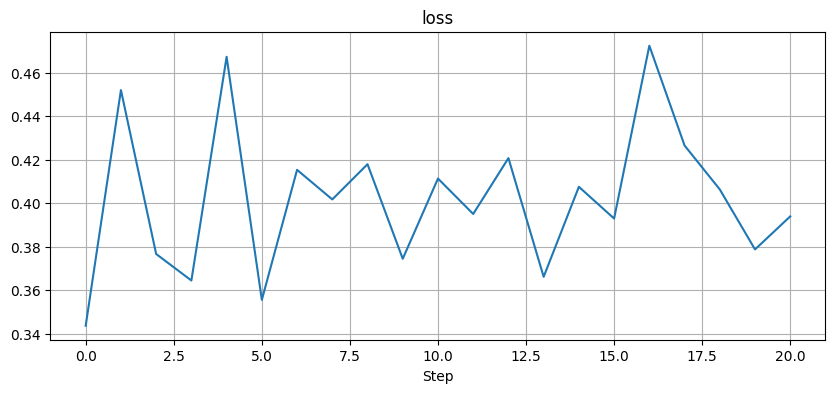

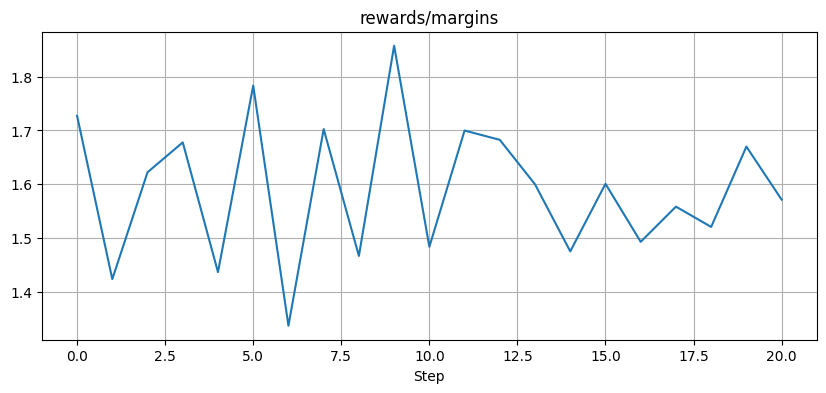

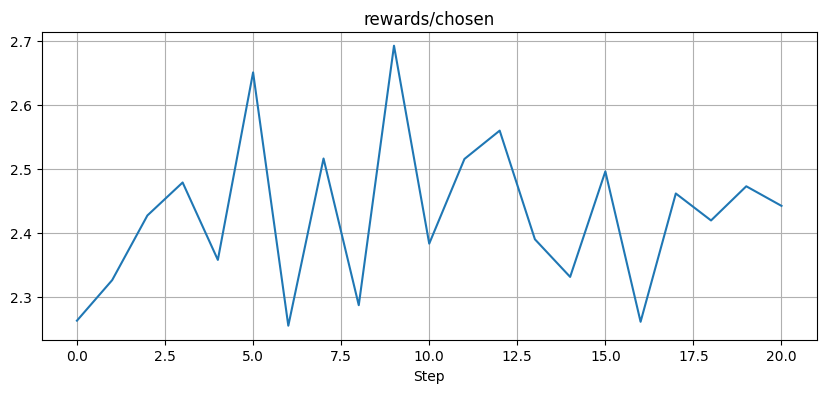

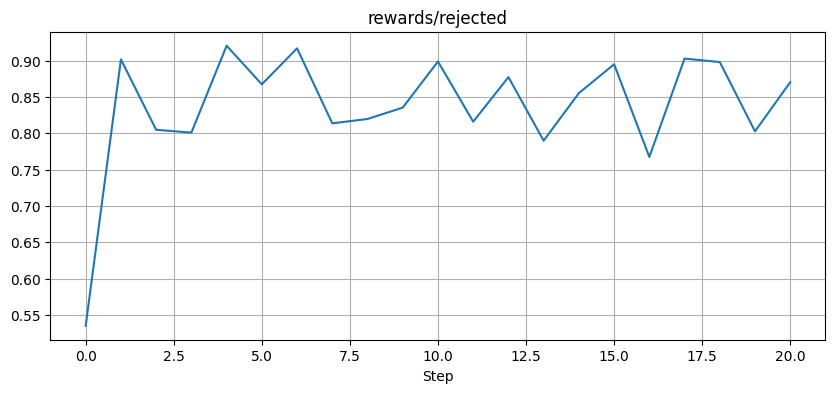

eval_loss no está en log_history
Columnas disponibles:
Index(['epoch', 'grad_norm', 'learning_rate', 'logits/chosen', 'logits/rejected', 'logps/chosen', 'logps/rejected',
       'loss', 'rewards/accuracies', 'rewards/chosen', 'rewards/margins', 'rewards/rejected', 'step', 'train_runtime',
       'train_samples_per_second', 'train_steps_per_second', 'total_flos', 'train_loss'],
      dtype='object')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

log_history = pd.DataFrame(dpo_trainer.state.log_history)

def plot_metric(name):
    if name in log_history.columns:
        plt.figure(figsize=(10,4))
        plt.plot(log_history[name])
        plt.title(name)
        plt.xlabel("Step")
        plt.grid(True)
        plt.show()
    else:
        print(f"{name} no está en log_history\nColumnas disponibles:\n{log_history.columns}")

# Métricas de entrenamiento
plot_metric("loss")

# Métricas de recompensas DPO
plot_metric("rewards/margins")
plot_metric("rewards/chosen")
plot_metric("rewards/rejected")

# 📌 Métrica de evaluación
plot_metric("eval_loss")



In [ ]:
print("model_max_length:", tokenizer.model_max_length)
print("padding_side:", tokenizer.padding_side)


model_max_length: 131072
padding_side: left


In [ ]:
import os

base = "/content/drive/MyDrive/dpo_llama_pls_v3"
checkpoints = [d for d in os.listdir(base) if d.startswith("checkpoint")]
print(checkpoints)

['checkpoint-408', 'checkpoint-50', 'checkpoint-52']


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
output_path = "/content/drive/MyDrive/llama_pls_dpo_adapter_v4_4epoch"
dpo_trainer.model.save_pretrained(output_path)
tokenizer.save_pretrained(output_path)

print(f"\n✅ Guardado en: {output_path}")


✅ Guardado en: /content/drive/MyDrive/llama_pls_dpo_adapter_v4_4epoch


In [ ]:
dpo_data=df_dpo

In [ ]:
dpo_data.head()


,ID,prompt,abstract,pls4,rejected,chosen
0,10.1002-14651858.CD012906,Using the following abstract of a biomedical s...,"Background\nWorldwide, there is an increasing ...",Plain Title: Understanding Type 2 Diabetes: Ho...,Plain TitleMetformin for type 2 diabetes melli...,Is metformin an effective treatment for adults...
1,10.1002-14651858.CD001289,Using the following abstract of a biomedical s...,Background\nBronchiectasis is predominantly an...,Plain Title: Understanding Bronchiectasis: Cau...,Bronchiectasis is a chronic lung disease chara...,Mucolytic drugs (to help make phlegm easier to...
2,10.1002-14651858.CD008123,Using the following abstract of a biomedical s...,Background\nBotulism is an acute paralytic ill...,Plain Title: Understanding Botulism: A Sudden ...,Botulism is a serious illness caused by a toxi...,Medical treatment for botulism\nReview questio...
3,10.1002-14651858.CD009752,Using the following abstract of a biomedical s...,Background\nCongenital heart disease is the mo...,"Plain Title: ""Heart Surgery Can Help Children ...",Plain Title Red Cell Transfusion in Patients W...,Blood transfusions in patients with heart prob...
4,10.1002-14651858.CD010942,Using the following abstract of a biomedical s...,Background\nIntensive care unit (ICU) acquired...,"Plain Title: ""Understanding CIM and CIP: Criti...",**Physical Rehabilitation for People with Acqu...,Rehabilitation interventions for people with c...


In [ ]:
dpo_data=df_dpo

In [ ]:
dpo_data

,ID,prompt,abstract,pls4,rejected,chosen
0,10.1002-14651858.CD012906,Using the following abstract of a biomedical s...,"Background\nWorldwide, there is an increasing ...",Plain Title: Understanding Type 2 Diabetes: Ho...,Plain TitleMetformin for type 2 diabetes melli...,Is metformin an effective treatment for adults...
1,10.1002-14651858.CD001289,Using the following abstract of a biomedical s...,Background\nBronchiectasis is predominantly an...,Plain Title: Understanding Bronchiectasis: Cau...,Bronchiectasis is a chronic lung disease chara...,Mucolytic drugs (to help make phlegm easier to...
2,10.1002-14651858.CD008123,Using the following abstract of a biomedical s...,Background\nBotulism is an acute paralytic ill...,Plain Title: Understanding Botulism: A Sudden ...,Botulism is a serious illness caused by a toxi...,Medical treatment for botulism\nReview questio...
3,10.1002-14651858.CD009752,Using the following abstract of a biomedical s...,Background\nCongenital heart disease is the mo...,"Plain Title: ""Heart Surgery Can Help Children ...",Plain Title Red Cell Transfusion in Patients W...,Blood transfusions in patients with heart prob...
4,10.1002-14651858.CD010942,Using the following abstract of a biomedical s...,Background\nIntensive care unit (ICU) acquired...,"Plain Title: ""Understanding CIM and CIP: Criti...",**Physical Rehabilitation for People with Acqu...,Rehabilitation interventions for people with c...
...,...,...,...,...,...,...
895,10.1002-14651858.CD010139,Using the following abstract of a biomedical s...,Background\nIndacaterol is an inhaled long‐act...,Plain Title: Understanding COPD: Managing Symp...,Indacaterol Inhaler for Chronic Obstructive Pu...,Indacaterol for the treatment of people with s...
896,10.1002-14651858.CD012825,Using the following abstract of a biomedical s...,Background\nAn increasing body of evidence sug...,"Plain Title: ""Anti-Inflammatory Medications an...",Anti‐inflammatory medications for prevention o...,Anti‐inflammatory medications for preventing m...
897,10.1002-14651858.CD001533,Using the following abstract of a biomedical s...,Background\nIn nephrotic syndrome protein leak...,"Plain Title: ""Understanding Nephrotic Syndrome...",Nephrotic Syndrome Treatment: A Review of Cort...,Corticosteroid therapy for children with nephr...
898,10.1002-14651858.CD012598,Using the following abstract of a biomedical s...,Background\nIntradialytic hypotension (IDH) is...,"Plain Title: ""Understanding Hemodialysis for C...",Plain Title Dialysate temperature reduction fo...,Dialysate temperature reduction for intradialy...


In [ ]:
import textwrap
import random
import re
import torch

# -----------------------------
# 1) Elegimos un ejemplo aleatorio
# -----------------------------
sample = dpo_data.sample(1).iloc[0]   # mucho más seguro que randint

# en dpo_data hay columnas: "abstract" y "prompt"
abstract_text = sample["abstract"]
prompt_text   = sample["prompt"]      # ← ESTA LÍNEA ERA LA QUE TE FALTABA

# -----------------------------
# 4) Tokenizar input
# -----------------------------
inputs = tokenizer(
    prompt_text,
    return_tensors="pt",
    truncation=True,
    max_length=4096,
).to(next(dpo_trainer.model.parameters()).device)

# -----------------------------
# 5) Generación con el modelo DPO final
# -----------------------------
with torch.no_grad():
    response_tensors = dpo_trainer.model.generate(
        **inputs,
        max_new_tokens=256,
        temperature=0.7,
        top_p=0.9,
        do_sample=True,
        pad_token_id=tokenizer.eos_token_id,
        use_cache=True
    )

generated_raw = tokenizer.decode(response_tensors[0], skip_special_tokens=True)

# -----------------------------
# 6) Extraer texto tras "### Output PLS:"
# -----------------------------
def clean_generated(text):
    pattern = r"###\s*Output\s*PLS\s*:?\s*(.*)"
    match = re.search(pattern, text, flags=re.IGNORECASE | re.DOTALL)
    return match.group(1).strip() if match else text.strip()

generated_clean = clean_generated(generated_raw)

# -----------------------------
# 7) Imprimir bonito
# -----------------------------
wrapper = textwrap.TextWrapper(width=120)

print("\n" + "="*120)
print("PROMPT:")
print("="*120)
print("\n".join(wrapper.wrap(prompt_text)))

print("\n" + "="*120)
print("GENERATED TEXT (raw):")
print("="*120)
print("\n".join(wrapper.wrap(generated_raw)))

print("\n" + "="*120)
print("GENERATED TEXT (clean):")
print("="*120)
print("\n".join(wrapper.wrap(generated_clean)))



Comprobación de que Alignscore funciona

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
# Initialize AlignScore with CORRECT API
    # device must be an INTEGER: 0 for cuda:0, 1 for cuda:1, -1 for CPU
# Parche temporal para compatibilidad
if not hasattr(transformers, "AdamW"):
    from torch.optim import AdamW
    transformers.AdamW = AdamW

from alignscore import AlignScore ### poner despues de AdamW

device_id = 0 if torch.cuda.is_available() else -1

align_scorer = AlignScore(
        model='roberta-base',
        batch_size=32,
        device=device_id,  # INTEGER, not string!
        ckpt_path='https://huggingface.co/yzha/AlignScore/resolve/main/AlignScore-base.ckpt',
        evaluation_mode='nli_sp',
        verbose=False
    )


device_name = f"cuda:{device_id}" if device_id >= 0 else "cpu"
print(f"✓ AlignScore model loaded on {device_name}!")

# Quick functionality test
contexts = ["The sky is blue during the day."]
claims = ["The sky has a blue color."]
scores = align_scorer.score(contexts=contexts, claims=claims)


print(f"✓ AlignScore working! Test score: {scores[0]:.4f}")
print(scores)
print("\n🎉 SUCCESS! AlignScore is ready to use with PyTorch 2.x")

In [ ]:
import trl
print(trl.__version__)

# 3.Generación con ejemplos para comprobar

In [ ]:
print(dpo_trainer.model.device)
print(next(dpo_trainer.model.parameters()).dtype)

In [ ]:
trainer=dpo_trainer.model

In [ ]:
dpo_data

In [ ]:
import torch, time
import textwrap

WRAP_WIDTH=120

# ⚙️ Configuración del tokenizer
tokenizer.padding_side = "left"
if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token

# ⚙️ Preparar el modelo
#trainer.model.to(torch.bfloat16).to("cuda")
trainer.model.eval()

# 🔹 Sample aleatorio
sample = dpo_data.sample(1).iloc[0]
prompt = instr_prompt.format(source=sample["abstract"])

# 🔹 Tokenización
inputs = tokenizer(prompt, return_tensors="pt").to(trainer.model.device)

# 🔹 Sincronizar y limpiar GPU
torch.cuda.empty_cache()
torch.cuda.synchronize()

# 🔹 Generar texto (modo turbo)
start = time.time()
with torch.inference_mode(), torch.cuda.amp.autocast(dtype=torch.bfloat16):
    outputs = trainer.model.generate(
        **inputs,
        use_cache=True, ###<--
        max_new_tokens=256,
        do_sample=True,          # 🔥 sampling evita bucles repetitivos
        temperature=0.7,
        top_p=0.9,
        repetition_penalty=1.3,  # penaliza repeticiones
        pad_token_id=tokenizer.eos_token_id
    )
torch.cuda.synchronize()

end = time.time()

# 🔹 Decodificación y limpieza
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

# Cortar la salida para quedarte solo con el texto después de "Output:"
if "Output:" in generated_text:
    generated_text = generated_text.split("Output PLS:", 1)[-1].strip()

# 🔹 Medición
elapsed = end - start
num_tokens = outputs.shape[-1] - inputs["input_ids"].shape[-1]
print(f"⏱ Tiempo total: {elapsed:.2f}s | 🚀 {num_tokens/elapsed:.1f} tokens/s")

# 🔹 Mostrar resultado
print("\n🧩 Prompt:\n", prompt)
print("\n📝 Generado (limpio):\n")
print(textwrap.fill(generated_text, width=WRAP_WIDTH))


In [ ]:
print(df_dpo.columns)

In [ ]:
def extract_response(gen):
    if "Output:" in gen:
        return gen.split("Output:", 1)[-1].strip()
    return gen.strip()

df_test["generated_clean"] = df_test["generated_text"].apply(extract_response)


In [ ]:
df_test.head()


# 4.Generación de Resumenes


In [ ]:
import torch
print("GPU disponible:", torch.cuda.is_available())
print("Dispositivo del modelo:", trainer.model.device)

GPU disponible: True
Dispositivo del modelo: cuda:0


## Preparar Dataset para pasar a DataFrame df_test para la Generación de Texto

## Generación de texto para el set TEST

In [ ]:
if "trainer" in locals() and hasattr(trainer, "model"):
    fine_tuned_model = trainer.model.eval()
else:
    fine_tuned_model = model.eval()

In [ ]:
import gc
import torch
from tqdm import tqdm
from difflib import SequenceMatcher
import re

In [ ]:
import gc
import torch
from tqdm import tqdm
from difflib import SequenceMatcher
import re

def generate_simplifications_v2(
    df,
    model,
    tokenizer,
    instr_prompt,
    batch_size=2,
    max_source_tokens=512,
    sim_threshold=0.75,
    verbose=True,
):
    """
    Genera textos simplificados con regeneración multinivel.
    Si el texto generado está vacío, intenta regenerar automáticamente.
    """

    import gc, torch, re
    from tqdm import tqdm
    from difflib import SequenceMatcher

    tokenizer.padding_side = "right"
    tokenizer.pad_token = tokenizer.eos_token
    tokenizer.clean_up_tokenization_spaces = True

    model.eval()
    model.config.use_cache = True
    model.config.output_hidden_states = False
    model.config.return_dict = True

    torch.cuda.empty_cache()
    gc.collect()

    if verbose:
        print("\n🚀 Generación iniciada (modo seguro, con detección de vacíos)...")

    # === FUNCIONES AUXILIARES ===
    def truncate_text(text, max_tokens=max_source_tokens):
        tokens = text.split()
        if len(tokens) <= max_tokens:
            return text
        head = tokens[:max_tokens // 2]
        tail = tokens[-max_tokens // 2:]
        return " ".join(head + ["[...]"] + tail)

    def safe_generate(prompts, gen_params):
        inputs = tokenizer(
            prompts,
            return_tensors="pt",
            padding=True,
            truncation=True,
            max_length=1536
        ).to(model.device)

        with torch.inference_mode():
            outputs = model.generate(**inputs, **gen_params)

        texts = tokenizer.batch_decode(
            outputs,
            skip_special_tokens=True,
            clean_up_tokenization_spaces=True,
            errors="replace"
        )
        return texts

    def extract_simplified_text(text):
        match = re.search(r"Output PLS\s*[:\-–]?\s*(.*)", text, re.IGNORECASE | re.DOTALL)
        if match:
            simplified = match.group(1).strip()
        else:
            simplified = text.strip()
        simplified = re.sub(r"<\|endoftext\|>", "", simplified)
        simplified = re.sub(r"\s+", " ", simplified).strip()
        return simplified

    # === PARÁMETROS DE GENERACIÓN ===
    GEN_PARAMS_L1 = {"max_new_tokens": 256, "temperature": 0.7, "top_p": 0.9, "do_sample": False,
                     "num_beams": 1, "repetition_penalty": 1.1,
                     "eos_token_id": tokenizer.eos_token_id, "pad_token_id": tokenizer.pad_token_id}

    GEN_PARAMS_L2 = {"max_new_tokens": 256, "temperature": 1.1, "top_p": 0.85, "do_sample": True,
                     "num_beams": 1, "repetition_penalty": 1.0,
                     "eos_token_id": tokenizer.eos_token_id, "pad_token_id": tokenizer.pad_token_id}

    GEN_PARAMS_L3 = {"max_new_tokens": 256, "temperature": 0.7, "top_p": 0.9, "do_sample": False,
                     "num_beams": 4, "repetition_penalty": 1.1,
                     "eos_token_id": tokenizer.eos_token_id, "pad_token_id": tokenizer.pad_token_id}

    # === PREPARACIÓN ===
    df = df.copy()
    df["source_for_generation"] = df["source"].apply(lambda x: truncate_text(x))
    if verbose:
        print("✅ Columna 'source_for_generation' creada correctamente")

    # === GENERACIÓN PRINCIPAL ===
    generated_texts, is_copy_list, was_regenerated_list = [], [], []
    regeneration_level_list, similarity_scores = [], []
    regeneration_count = 0

    for i in tqdm(range(0, len(df), batch_size), desc="Generando simplificaciones"):
        if i % 10 == 0:
            torch.cuda.empty_cache()
            gc.collect()

        batch_sources = df["source"].iloc[i:i+batch_size].tolist()
        batch_sources_trunc = df["source_for_generation"].iloc[i:i+batch_size].tolist()
        batch_prompts = [instr_prompt.format(source=s) for s in batch_sources_trunc]

        full_texts = safe_generate(batch_prompts, GEN_PARAMS_L1)

        for j, full_text in enumerate(full_texts):
            simplified = extract_simplified_text(full_text)
            source_idx = i + j
            if source_idx >= len(df):
                continue

            # 🔍 --- NUEVO BLOQUE: REGENERACIÓN SI EL TEXTO ESTÁ VACÍO ---
            if not simplified or len(simplified.strip()) == 0:
                if verbose:
                    print(f"⚠️ Texto vacío detectado en índice {source_idx}. Regenerando...")
                single_prompt = instr_prompt.format(source=batch_sources_trunc[j])
                regen_text = safe_generate([single_prompt], GEN_PARAMS_L2)[0]
                simplified = extract_simplified_text(regen_text)
                # Si sigue vacío, prueba con L3
                if not simplified or len(simplified.strip()) == 0:
                    beam_text = safe_generate([single_prompt], GEN_PARAMS_L3)[0]
                    simplified = extract_simplified_text(beam_text)

            # === Calcular similitud y regeneraciones ===
            sim = SequenceMatcher(None, batch_sources[j].lower(), simplified.lower()).ratio()
            is_copy = sim > sim_threshold
            regen_level = 0

            if is_copy:
                regeneration_count += 1
                single_prompt = instr_prompt.format(source=batch_sources_trunc[j])

                regen_text = safe_generate([single_prompt], GEN_PARAMS_L2)[0]
                simplified_regen = extract_simplified_text(regen_text)
                sim_regen = SequenceMatcher(None, batch_sources[j].lower(), simplified_regen.lower()).ratio()

                if sim_regen <= sim_threshold:
                    simplified, sim, is_copy, regen_level = simplified_regen, sim_regen, False, 2
                else:
                    beam_text = safe_generate([single_prompt], GEN_PARAMS_L3)[0]
                    simplified_beam = extract_simplified_text(beam_text)
                    sim_beam = SequenceMatcher(None, batch_sources[j].lower(), simplified_beam.lower()).ratio()

                    if sim_beam <= sim_threshold:
                        simplified, sim, is_copy, regen_level = simplified_beam, sim_beam, False, 3
                    else:
                        if sim_beam < sim_regen:
                            simplified, sim, regen_level = simplified_beam, sim_beam, 3
                        else:
                            simplified, sim, regen_level = simplified_regen, sim_regen, 2

            generated_texts.append(simplified)
            is_copy_list.append(is_copy)
            was_regenerated_list.append(regen_level > 0)
            regeneration_level_list.append(regen_level)
            similarity_scores.append(sim)

    # === GUARDAR RESULTADOS ===
    df["generated_text"] = generated_texts
    df["is_copy"] = is_copy_list
    df["was_regenerated"] = was_regenerated_list
    df["regeneration_level"] = regeneration_level_list
    df["similarity_score"] = similarity_scores

    if verbose:
        print(f"\n✅ Generación completada sin errores de memoria")
        print(f"📊 Total textos: {len(df)} | Regenerados: {sum(was_regenerated_list)} | Copias finales: {sum(is_copy_list)}")
        print(f"Promedio de similitud: {sum(similarity_scores)/len(similarity_scores):.3f}")

    return df


In [ ]:
df_dpo_sample = dpo_data.sample(40, random_state=42).reset_index(drop=True)

In [ ]:
df_dpo_sample = df_dpo_sample.rename(columns={"abstract": "source"})

In [ ]:
df_dpo_sample

,ID,prompt,source,pls4,rejected,chosen
0,10.1002-14651858.CD013169,Using the following abstract of a biomedical s...,Background\nObstructive sleep apnoea syndrome ...,"Plain Title: ""Understanding OSAS: Sleep Breath...",Obstructive Sleep Apnoea Syndrome and Erectile...,Non‐invasive positive airway pressure therapy ...
1,10.1002-14651858.CD007228,Using the following abstract of a biomedical s...,Background\nSpecialised disease management pro...,Plain Title: Challenges in Providing Quality H...,Heart Failure Management Interventions for Peo...,Structured telephone support and non‐invasive ...
2,10.1002-14651858.CD010570,Using the following abstract of a biomedical s...,Background\nTargeted temperature management (a...,Plain Title: Basic Life Support for Sudden Car...,Plain Title Cooling after cardiac arrest: does...,Should patients experiencing sudden cardiac de...
3,10.1002-14651858.CD011628,Using the following abstract of a biomedical s...,Background\nPalmoplantar pustulosis is a chron...,"Plain Title: ""Palmoplantar Pustulosis: Impact ...",Chronic palmoplantar pustulosis is a skin cond...,Treating long‐term palmoplantar pustulosis (pu...
4,10.1002-14651858.CD005291,Using the following abstract of a biomedical s...,Background\nIn in vitro fertilisation (IVF) wi...,"Plain Title: ""Choosing the Best Embryos in IVF...",**Intracytoplasmic Sperm Injection (ICSI) and ...,Preimplantation genetic testing for abnormal c...
5,10.1002-14651858.CD012301,Using the following abstract of a biomedical s...,Background\nThe para‐aortic lymph nodes (locat...,"Plain Title: ""Pelvic Radiotherapy for Cervical...",Cervical Cancer Treatment: Does Extended‐Field...,Does extended‐field radiotherapy reduce death ...
6,10.1002-14651858.CD008754,Using the following abstract of a biomedical s...,"Background\nProblems with cognition, particula...","Plain Title: ""Memory Rehabilitation for People...",Memory Rehabilitation for People with Multiple...,Memory rehabilitation in multiple sclerosis\nR...
7,10.1002-14651858.CD007076,Using the following abstract of a biomedical s...,Background\nThis review updates part of an ear...,Plain Title: Understanding Neuropathic Pain: N...,Pregabalin for Chronic Neuropathic Pain in Adu...,Pregabalin for chronic neuropathic pain in adu...
8,10.1002-14651858.CD001337,Using the following abstract of a biomedical s...,Background\nRetained placenta is a common comp...,Plain Title: Understanding Retained Placenta: ...,Retained Placenta: Umbilical Vein Injection of...,Umbilical vein injection after childbirth for ...
9,10.1002-14651858.CD011333,Using the following abstract of a biomedical s...,Background\nThe Informant Questionnaire for Co...,"Plain Title: ""Timely Diagnosis of Dementia: Ad...",Plain Title Informant‐based questionnaire for ...,Using a structured questionnaire (the IQCODE) ...


Necesita source y response

In [ ]:
df_out = generate_simplifications_v2(
    df=df_dpo_sample,
    model=fine_tuned_model,
    tokenizer=tokenizer,
    instr_prompt=instr_prompt,
    batch_size=2,
)


🚀 Generación iniciada (modo seguro, con detección de vacíos)...
✅ Columna 'source_for_generation' creada correctamente


Generando simplificaciones:   0%|          | 0/20 [00:00<?, ?it/s]The following generation flags are not valid and may be ignored: ['temperature', 'top_p']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
A decoder-only architecture is being used, but right-padding was detected! For correct generation results, please set `padding_side='left'` when initializing the tokenizer.
Generando simplificaciones: 100%|██████████| 20/20 [09:56<00:00, 29.84s/it]


✅ Generación completada sin errores de memoria
📊 Total textos: 40 | Regenerados: 0 | Copias finales: 0
Promedio de similitud: 0.023


In [ ]:
ref = "PLS_DPO_4_epochs_v6_L4_4_epochs_CE_KL_PROMPT1_2000_instruct_Low_v2"
filename = f"pls_results_{ref}.csv"
save_path = f"/content/drive/MyDrive/{filename}"

df_out.to_csv(save_path, index=False, encoding="utf-8")
print(f"📁 Archivo guardado en: {save_path}")

📁 Archivo guardado en: /content/drive/MyDrive/pls_results_PLS_DPO_4_epochs_v6_L4_4_epochs_CE_KL_PROMPT1_2000_instruct_Low_v2.csv


In [ ]:
count_plain_title = df_out['generated_text'].str.startswith(
    ("Plain Title", "**Plain Title")
).sum()
count_plain_title
pct = 100 * count_plain_title / len(df_out)
print(f"{count_plain_title} textos ({pct:.2f}%) empiezan con 'Plain Title:'")

31 textos (77.50%) empiezan con 'Plain Title:'


In [ ]:
import textwrap
import random

# =====================================================================
# EJEMPLOS DE SALIDA SIMPLIFICADA (5 EJEMPLOS ALEATORIOS)
# =====================================================================
print("\n🧾 Ejemplos de salida simplificada (x muestras al azar):\n" + "="*70)

# Elegimos 5 índices únicos aleatorios del DataFrame
idx_list = random.sample(range(len(df_out)), k=1)

for idx in idx_list:

    print(f"\n🔹 Índice: {idx}")

    # ----- Texto original -----
    print("\n--- Texto original (source) ---")
    src = df_out.loc[idx, "source"][:1000]
    wrapped_src = "\n".join(textwrap.wrap(src, width=120))
    print(wrapped_src)

    # ----- Texto simplificado -----
    print("\n--- Texto simplificado generado ---")
    gen = df_out.loc[idx, "generated_text"]
    wrapped_gen = "\n".join(textwrap.wrap(gen, width=120))
    print(wrapped_gen)

    print("\n" + "-"*70)

print("\n" + "="*70)




🧾 Ejemplos de salida simplificada (x muestras al azar):

🔹 Índice: 7

--- Texto original (source) ---
Background This review updates part of an earlier Cochrane Review titled "Pregabalin for acute and chronic pain in
adults", and considers only neuropathic pain (pain from damage to nervous tissue). Antiepileptic drugs have long been
used in pain management. Pregabalin is an antiepileptic drug used in management of chronic pain conditions.  Objectives
To assess the analgesic efficacy and adverse effects of pregabalin for chronic neuropathic pain in adults.  Search
methods We searched CENTRAL, MEDLINE, and Embase for randomised controlled trials from January 2009 to April 2018,
online clinical trials registries, and reference lists.  Selection criteria We included randomised, double‐blind trials
of two weeks' duration or longer, comparing pregabalin (any route of administration) with placebo or another active
treatment for neuropathic pain, with participant‐reported pain assessment.  Da




# 5.Métricas


## Evaluación y Métricas

In [ ]:
print(df_out.columns)

Index(['ID', 'prompt', 'source', 'pls4', 'rejected', 'chosen',
       'source_for_generation', 'generated_text', 'is_copy', 'was_regenerated',
       'regeneration_level', 'similarity_score'],
      dtype='object')


In [ ]:
df_out.head()

,ID,prompt,source,pls4,rejected,chosen,source_for_generation,generated_text,is_copy,was_regenerated,regeneration_level,similarity_score
0,10.1002-14651858.CD013169,Using the following abstract of a biomedical s...,Background\nObstructive sleep apnoea syndrome ...,"Plain Title: ""Understanding OSAS: Sleep Breath...",Obstructive Sleep Apnoea Syndrome and Erectile...,Non‐invasive positive airway pressure therapy ...,Background Obstructive sleep apnoea syndrome (...,**Understanding Sleep Apnea and Its Impact on ...,False,False,0,0.042494
1,10.1002-14651858.CD007228,Using the following abstract of a biomedical s...,Background\nSpecialised disease management pro...,Plain Title: Challenges in Providing Quality H...,Heart Failure Management Interventions for Peo...,Structured telephone support and non‐invasive ...,Background Specialised disease management prog...,**Plain Title** Heart Failure Management: Does...,False,False,0,0.012760
2,10.1002-14651858.CD010570,Using the following abstract of a biomedical s...,Background\nTargeted temperature management (a...,Plain Title: Basic Life Support for Sudden Car...,Plain Title Cooling after cardiac arrest: does...,Should patients experiencing sudden cardiac de...,Background\nTargeted temperature management (a...,**Plain Title** Cooling after Cardiac Arrest: ...,False,False,0,0.025091
3,10.1002-14651858.CD011628,Using the following abstract of a biomedical s...,Background\nPalmoplantar pustulosis is a chron...,"Plain Title: ""Palmoplantar Pustulosis: Impact ...",Chronic palmoplantar pustulosis is a skin cond...,Treating long‐term palmoplantar pustulosis (pu...,Background Palmoplantar pustulosis is a chroni...,**Plain Title** Palmoplantar Pustulosis Treatm...,False,False,0,0.020778
4,10.1002-14651858.CD005291,Using the following abstract of a biomedical s...,Background\nIn in vitro fertilisation (IVF) wi...,"Plain Title: ""Choosing the Best Embryos in IVF...",**Intracytoplasmic Sperm Injection (ICSI) and ...,Preimplantation genetic testing for abnormal c...,Background In in vitro fertilisation (IVF) wit...,**Understanding the Benefits and Risks of Prei...,False,False,0,0.009657


In [ ]:
# ============================================================================
# 📊 PASO 1: CALCULAR MÉTRICAS (BERTScore + TextStat + AlignScore)
# ============================================================================

from bert_score import score as bertscore
import textstat
import pandas as pd
import torch
import transformers
from sentence_transformers import SentenceTransformer

EMB_MODEL = "sentence-transformers/all-mpnet-base-v2"  # cambia por modelo biomédico si quieres
DEVICE = "cuda" if (torch and torch.cuda.is_available()) else "cpu"
EMB_BATCH = 256   # reducir si OOM en T4 (prueba 128/64)

'''# Fix para AdamW
if not hasattr(transformers, "AdamW"):
    from torch.optim import AdamW
    transformers.AdamW = AdamW

from alignscore import AlignScore
'''

print("="*80)
print("📊 CALCULANDO MÉTRICAS")
print("="*80)

# --------------------------------------------------------
# 🔧 CONFIGURACIÓN INICIAL
# --------------------------------------------------------
col_ref = "chosen" #pls
col_gen = "generated_text"  # ← Cambié a generated_text (ajusta si es otro)
col_non_pls="source" #source abstract

# Crear columna limpia si no existe
if col_gen not in df_out.columns and "generated_text" in df_test.columns:
    df_out["generated_clean"] = df_out["generated_text"].str.strip()
    col_gen = "generated_clean"

print(f"\n✓ Columna de referencia: {col_ref}")
print(f"✓ Columna generada: {col_gen}")
print(f"✓ Total textos: {len(df_out)}")

# --------------------------------------------------------
# 🧩 BERTScore
# --------------------------------------------------------
print("\n📊 Calculando BERTScore...")

refs = df_out[col_ref].astype(str).tolist() #pls
preds = df_out[col_gen].astype(str).tolist()
non_pls=df_out[col_non_pls].astype(str).tolist()

# Detectar idioma (ajusta: "es" o "en")
P, R, F1 = bertscore(preds, refs, lang="en", verbose=False)

df_out["BERT_Precision"] = P.numpy()
df_out["BERT_Recall"] = R.numpy()
df_out["BERT_F1"] = F1.numpy()

print(f"✅ BERTScore calculado")
print(f"   - Precision media: {P.mean():.3f}")
print(f"   - Recall media: {R.mean():.3f}")
print(f"   - F1 media: {F1.mean():.3f}")

# --------------------------------------------------------
# 📚 TextStat (legibilidad y complejidad)
# --------------------------------------------------------
print("\n📚 Calculando métricas TextStat...")

def get_textstat_metrics(text):
    try:
        return {
            "flesch_reading_ease": textstat.flesch_reading_ease(text),
            "flesch_kincaid_grade": textstat.flesch_kincaid_grade(text),
            "smog_index": textstat.smog_index(text),
            "coleman_liau_index": textstat.coleman_liau_index(text),
            "automated_readability_index": textstat.automated_readability_index(text),
            "dale_chall_readability_score": textstat.dale_chall_readability_score(text),
            "difficult_words": textstat.difficult_words(text),
            "linsear_write_formula": textstat.linsear_write_formula(text),
            "gunning_fog": textstat.gunning_fog(text),
        }
    except:
        return {key: None for key in [
            "flesch_reading_ease", "flesch_kincaid_grade", "smog_index",
            "coleman_liau_index", "automated_readability_index",
            "dale_chall_readability_score", "difficult_words",
            "linsear_write_formula", "gunning_fog"
        ]}

textstat_metrics = df_out[col_gen].apply(get_textstat_metrics)
df_textstat = pd.DataFrame(textstat_metrics.tolist()).add_prefix("TextStat_")

df_out = pd.concat([df_out, df_textstat], axis=1)

print(f"✅ TextStat calculado ({len(df_textstat.columns)} métricas)")

# --------------------------------------------------------
# 🔗 AlignScore o Equivalente Rapido
# --------------------------------------------------------
# -------- SI NO HAY SCORE, CALCULARLO (GPU / batching) --------
print("\n🔗 Calculando AlignScore (versión ligera)...")

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"   Usando: {device}")

def compute_pairwise_align(ref_texts, gen_texts, model_name=EMB_MODEL, batch_size=EMB_BATCH, device=device):
    if SentenceTransformer is None:
        raise ImportError("sentence-transformers no está instalado. Instálalo con: pip install sentence-transformers")
    if len(ref_texts) != len(gen_texts):
        raise ValueError("refs y gens deben tener la misma longitud")

    model = SentenceTransformer(model_name, device=device)
    model.max_seq_length = 512

    def encode_list(texts):
        embs = []
        for i in tqdm(range(0, len(texts), batch_size), desc="Encoding", leave=False):
            batch = texts[i:i+batch_size]
            b_emb = model.encode(batch, convert_to_tensor=True, show_progress_bar=False)
            b_emb = torch.nn.functional.normalize(b_emb, p=2, dim=1)
            embs.append(b_emb)
        return torch.cat(embs, dim=0)

    refs_emb = encode_list(ref_texts)
    gens_emb = encode_list(gen_texts)
    refs_emb = refs_emb.to(device)
    gens_emb = gens_emb.to(device)

    with torch.no_grad():
        cosines = torch.sum(refs_emb * gens_emb, dim=1).clamp(-1.0, 1.0).cpu().numpy()
    return cosines

# Calcular y guardar
align_scores = compute_pairwise_align(non_pls, preds)
df_out["AlignScore"] = align_scores

print(f"✅ AlignScore calculado (cosine embedding)")
print(f"   - Media: {sum(align_scores)/len(align_scores):.3f}")

print("\n" + "="*80)
print("✅ TODAS LAS MÉTRICAS CALCULADAS")
print("="*80)

# ============================================================================
# 📊 PASO 2: RESUMEN DE MÉTRICAS - TABLA PROFESIONAL
# ============================================================================

from tabulate import tabulate

print("\n🔧 Preparando tablas de resumen...")

# Renombrar TextStat con nombres cortos
textstat_rename = {
    "TextStat_flesch_reading_ease": "FRE",
    "TextStat_flesch_kincaid_grade": "FKGL",
    "TextStat_smog_index": "SMOG",
    "TextStat_coleman_liau_index": "CLI",
    "TextStat_dale_chall_readability_score": "DCRS",
    "TextStat_gunning_fog": "GFI",
}

# Aplicar renombrado
rename_dict = {k: v for k, v in textstat_rename.items() if k in df_out.columns}
df_out_display = df_out.rename(columns=rename_dict)

# Seleccionar columnas de métricas
metric_columns = [
    "BERT_Precision",
    "BERT_Recall",
    "BERT_F1",
    "AlignScore"
] + [v for v in textstat_rename.values() if v in df_out_display.columns]

# Añadir columnas TextStat no renombradas
other_textstat = [col for col in df_out.columns if col.startswith("TextStat_") and col not in textstat_rename]
metric_columns.extend(other_textstat)

# Crear DataFrame de métricas sin duplicados
df_metrics = df_out_display[metric_columns].copy()
df_metrics = df_metrics.loc[:, ~df_metrics.columns.duplicated()]

print(f"✓ Métricas seleccionadas: {len(df_metrics.columns)} columnas")

# ============================================================================
# ✅ CREAR stats_df
# ============================================================================

stats_df = pd.DataFrame({
    'Mean': df_metrics.mean(numeric_only=True),
    'Std': df_metrics.std(numeric_only=True),
    'Min': df_metrics.min(numeric_only=True),
    'Max': df_metrics.max(numeric_only=True),
    'Median': df_metrics.median(numeric_only=True),
}).T

print(f"✓ stats_df creado: {stats_df.shape}")

# ============================================================================
# 📈 TABLA DE MÉTRICAS POR TEXTO (primeros 10)
# ============================================================================

print("\n" + "="*120)
print("📊 MÉTRICAS POR TEXTO (Primeros 10 ejemplos)")
print("="*120)

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)
pd.set_option('display.float_format', '{:.3f}'.format)

print("\n")
print(df_metrics.head(10).to_string())
print("\n" + "="*120)

# ============================================================================
# 📊 ESTADÍSTICAS GLOBALES
# ============================================================================

print("\n" + "="*120)
print("📈 ESTADÍSTICAS GLOBALES")
print("="*120 + "\n")

# Preparar datos para tabulate
table_data = []
for stat_name in ['Mean', 'Std', 'Min', 'Max', 'Median']:
    row = [stat_name] + [f"{val:.3f}" for val in stats_df.loc[stat_name]]
    table_data.append(row)

headers = ['Statistic'] + list(stats_df.columns)

print(tabulate(table_data, headers=headers, tablefmt='grid',
               stralign='center', numalign='center'))
print()

# ============================================================================
# 📊 REFERENCIA COMPARATIVA (Modelos del paper CL4Health 2025)
# ============================================================================

reference_data = [
    ["DeepSeek-R1-7B",        16.99, 22.75, 17.69, 12.31, 14.80, 9.45, 0.7955, 0.8496],
    ["Gemini-1.3-Flash",      9.60,  66.87, 8.75,  9.08,  6.90,  5.94, 0.6333, 0.8474],
    ["GPT-4-32K",            12.48,  48.52, 13.39, 11.20, 10.80, 7.41, 0.7801, 0.8519],
    ["GPT-4o",               11.49,  57.13, 11.16,  9.91,  9.09, 6.88, 0.7383, 0.8527],
    ["GPT-3.5-Turbo-16K",    15.52,  28.08, 17.33, 12.59, 13.91, 8.60, 0.8781, 0.8585],
    ["Llama-3.2-3B",         16.42,  21.96, 18.58, 10.79, 15.73, 9.39, 0.8785, 0.8490],
]

ref_headers = ["Model", "CLI ↓", "FRE ↑", "GFI ↓", "SMOG ↓", "FKGL ↓", "DCRS ↓", "AlignScore ↑", "BERTScore ↑"]

print("\n" + "="*120)
print("📊 TABLA DE REFERENCIA (Valores del paper CL4Health-2025)")
print("="*120 + "\n")

print(tabulate(reference_data, headers=ref_headers, tablefmt="grid",
               stralign="center", numalign="center"))
print()

# ============================================================================
# 🎯 RESUMEN EJECUTIVO
# ============================================================================

print("\n" + "="*100)
print("🎯 RESUMEN EJECUTIVO")
print("="*100)

key_metrics = {
    "Semantic Similarity": {
        "BERT F1": df_metrics["BERT_F1"].mean() if "BERT_F1" in df_metrics.columns else None,
        "AlignScore": df_metrics["AlignScore"].mean() if "AlignScore" in df_metrics.columns else None,
    },
    "Readability": {
        "Flesch Ease (FRE)": df_metrics["FRE"].mean() if "FRE" in df_metrics.columns else None,
        "FK Grade Level": df_metrics["FKGL"].mean() if "FKGL" in df_metrics.columns else None,
        "SMOG Index": df_metrics["SMOG"].mean() if "SMOG" in df_metrics.columns else None,
    },
    "Complexity": {
        "Coleman-Liau": df_metrics["CLI"].mean() if "CLI" in df_metrics.columns else None,
        "Dale-Chall": df_metrics["DCRS"].mean() if "DCRS" in df_metrics.columns else None,
        "Gunning Fog": df_metrics["GFI"].mean() if "GFI" in df_metrics.columns else None,
    }
}

for category, metrics in key_metrics.items():
    print(f"\n📌 {category}:")
    for metric_name, value in metrics.items():
        if value is not None:
            # Emoji según valor
            if "F1" in metric_name or "AlignScore" in metric_name:
                emoji = "✅" if value >= 0.7 else "⚠️" if value >= 0.5 else "❌"
            elif "Flesch" in metric_name or "FRE" in metric_name:
                emoji = "✅" if value >= 60 else "⚠️" if value >= 50 else "❌"
            elif any(x in metric_name for x in ["Grade", "SMOG", "Coleman", "Dale", "Gunning"]):
                emoji = "✅" if value <= 10 else "⚠️" if value <= 12 else "❌"
            else:
                emoji = "📊"

            print(f"   {emoji} {metric_name:.<35} {value:>8.3f}")

print("="*100)

# ============================================================================
# 💾 EXPORTAR A CSV
# ============================================================================

df_metrics.to_csv("metrics_complete.csv", index=False)
stats_df.T.to_csv("metrics_summary.csv")

print("\n💾 Tablas guardadas:")
print("   - metrics_complete.csv (todas las métricas por texto)")
print("   - metrics_summary.csv (estadísticas resumidas)")
print()

📊 CALCULANDO MÉTRICAS

✓ Columna de referencia: chosen
✓ Columna generada: generated_text
✓ Total textos: 40

📊 Calculando BERTScore...


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ BERTScore calculado
   - Precision media: 0.867
   - Recall media: 0.836
   - F1 media: 0.851

📚 Calculando métricas TextStat...
✅ TextStat calculado (9 métricas)

🔗 Calculando AlignScore (versión ligera)...
   Usando: cuda


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

✅ AlignScore calculado (cosine embedding)
   - Media: 0.885

✅ TODAS LAS MÉTRICAS CALCULADAS

🔧 Preparando tablas de resumen...
✓ Métricas seleccionadas: 13 columnas
✓ stats_df creado: (5, 13)

📊 MÉTRICAS POR TEXTO (Primeros 10 ejemplos)


   BERT_Precision  BERT_Recall  BERT_F1  AlignScore    FRE   FKGL   SMOG    CLI   DCRS    GFI  TextStat_automated_readability_index  TextStat_difficult_words  TextStat_linsear_write_formula
0           0.861        0.825    0.843       0.886 47.781 10.302 12.231 12.681 11.946 12.567                                11.888                        58                          11.667
1           0.859        0.832    0.845       0.955 33.440 12.169 12.767 17.563 12.118 12.385                                15.760                        63                           8.714
2           0.867        0.831    0.848       0.935 39.116 11.264 12.541 14.644 11.210 12.956                                13.215                        54                           8.714


In [ ]:

# Filtrar los casos con AlignScore < 0.3
low_align = df_out[df_out["AlignScore"] < 0.3]

# Mostrar cuántos hay
print(f"🧮 {len(low_align)} ejemplos con AlignScore < 0.3\n")

# Iterar sobre los primeros 10 ejemplos
for i, row in enumerate(low_align[["source", "chosen", "generated_text", "AlignScore"]].head(10).itertuples(), start=1):
    print(f"\n🔹 Ejemplo {i} | AlignScore: {row.AlignScore:.3f}")
    print("=" * 150)

    # Texto original (source)
    print("\n--- Texto original (source) ---")
    print(textwrap.fill(row.source.replace("\\n", "\n"), width=150, replace_whitespace=False))

    # Respuesta de referencia (ground truth)
    print("\n--- Resumen de referencia (response) ---")
    print(textwrap.fill(row.response.replace("\\n", "\n"), width=150, replace_whitespace=False))

    # Texto generado por el modelo
    print("\n--- Texto simplificado generado ---")
    print(textwrap.fill(row.generated_text.replace("\\n", "\n"), width=150, replace_whitespace=False))

    print("-" * 150)

🧮 0 ejemplos con AlignScore < 0.3



In [ ]:
# Filtrar los casos con AlignScore > 0.8
low_align = df_out[df_out["AlignScore"] > 0.8]

# Mostrar cuántos hay
print(f"🧮 {len(low_align)} ejemplos con AlignScore > 0.8\n")

# Iterar sobre los primeros 10 ejemplos
for i, row in enumerate(low_align[["source", "chosen", "generated_text", "AlignScore"]].head(10).itertuples(), start=1):
    print(f"\n🔹 Ejemplo {i} | AlignScore: {row.AlignScore:.3f}")
    print("=" * 150)

    # Texto original (source)
    print("\n--- Texto original (source) ---")
    print(textwrap.fill(row.source.replace("\\n", "\n"), width=150, replace_whitespace=False))

    # Respuesta de referencia (ground truth)
    print("\n--- Resumen de referencia (response) ---")
    print(textwrap.fill(row.chosen.replace("\\n", "\n"), width=150, replace_whitespace=False))

    # Texto generado por el modelo
    print("\n--- Texto simplificado generado ---")
    print(textwrap.fill(row.generated_text.replace("\\n", "\n"), width=150, replace_whitespace=False))

    print("-" * 150)

🧮 34 ejemplos con AlignScore > 0.8


🔹 Ejemplo 1 | AlignScore: 0.886

--- Texto original (source) ---
Background
Obstructive sleep apnoea syndrome (OSAS) is associated with several chronic diseases, including erectile dysfunction (ED). The association
of OSAS and ED is far more common than might be found by chance; the treatment of OSAS with non‐invasive positive airway pressure therapy is
associated with improvement of respiratory symptoms, and may contribute to the improvement of associated conditions, such as ED. 
Objectives
To assess
the effectiveness and acceptability of non‐invasive positive airway pressure therapy for improving erectile dysfunction in OSAS. 
Search methods
We
identified studies from the Cochrane Airways Trials Register, CENTRAL, MEDLINE, Embase, PsycINFO, CINAHL, AMED EBSCO, and LILACS, the US National
Institutes of Health ongoing trials register ClinicalTrials.gov, and the World Health Organisation international clinical trials registry platform to
14 June 2021

In [ ]:
# Filtrar casos con AlignScore > 0.
low_align = df_out[df_out["AlignScore"] > 0.]

print(f"🧮 {len(low_align)} ejemplos con AlignScore > 0.0\n")

for i, row in enumerate(
    low_align[["generated_text", "AlignScore"]].itertuples(),
    start=1
):
    first_line = row.generated_text.split("\n")[0].strip()

    print(f"{i:02d}. AlignScore={row.AlignScore:.3f} → {first_line}")


🧮 40 ejemplos con AlignScore > 0.0

01. AlignScore=0.886 → **Understanding Sleep Apnea and Its Impact on Men's Health** Sleep apnea is a common condition where breathing stops and starts during sleep, causing pauses in breathing and oxygen levels to drop. This can lead to various health problems, including erectile dysfunction (ED). Many men experience ED, but it's often linked to underlying sleep disorders like sleep apnea. Our goal is to explore whether treating sleep apnea with non-invasive positive airway pressure therapy (NIPAT) can help improve ED symptoms. **Why Study Sleep Apnea and ED?** Sleep apnea affects many people worldwide, particularly those who snore loudly or experience daytime fatigue. It's also associated with other health issues, such as heart disease, high blood pressure, and stroke. Since ED is a common problem among men, understanding its connection to sleep apnea is crucial. By studying NIPAT, we aim to determine if it can treat ED effectively and safely. **Stu

# 6. Chequeo de que no degenera el modelo Instruct


In [ ]:
# ================================
# TEST: ¿Mantiene capacidades generales?
# ================================

from transformers import AutoModelForCausalLM, AutoTokenizer
from peft import PeftModel
import torch

BASE_MODEL = "meta-llama/Llama-3.2-3B-Instruct"
SFT_ADAPTER = "/content/drive/MyDrive/llama3_models/adapter_v6_T4_2_epochs_CE_PROMPT1_2000_instruct"

# Cargar modelo SFT
model = AutoModelForCausalLM.from_pretrained(
    BASE_MODEL,
    torch_dtype=torch.float16,
    device_map="auto"
)
model = PeftModel.from_pretrained(model, SFT_ADAPTER)
tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)

# ================================
# TEST 1: Tarea médica (tu dominio)
# ================================

prompt1 = """Generate a Plain Language Summary from this abstract:

Abstract: Congenital heart disease affects 4-9 children per 1000 births...

Output:"""

output1 = model.generate(
    **tokenizer(prompt1, return_tensors="pt").to(model.device),
    max_new_tokens=300,
    temperature=0.7
)
print("TEST 1 (dominio entrenado):")
print(tokenizer.decode(output1[0], skip_special_tokens=True))

# ================================
# TEST 2: Tarea general (fuera de dominio)
# ================================

prompt2 = """Write a short poem about artificial intelligence.

Poem:"""

output2 = model.generate(
    **tokenizer(prompt2, return_tensors="pt").to(model.device),
    max_new_tokens=100,
    temperature=0.7
)
print("\nTEST 2 (fuera de dominio):")
print(tokenizer.decode(output2[0], skip_special_tokens=True))

# ================================
# TEST 3: Seguir instrucciones complejas
# ================================

prompt3 = """Answer the following question in exactly 3 bullet points:

Question: What are the main benefits of exercise?

Answer:"""

output3 = model.generate(
    **tokenizer(prompt3, return_tensors="pt").to(model.device),
    max_new_tokens=150,
    temperature=0.7
)
print("\nTEST 3 (instruction following):")
print(tokenizer.decode(output3[0], skip_special_tokens=True))

# ================================
# TEST 4: Razonamiento general
# ================================

prompt4 = """Solve this problem step by step:

If a train travels 120 km in 2 hours, what is its average speed?

Solution:"""

output4 = model.generate(
    **tokenizer(prompt4, return_tensors="pt").to(model.device),
    max_new_tokens=200,
    temperature=0.7
)
print("\nTEST 4 (reasoning):")
print(tokenizer.decode(output4[0], skip_special_tokens=True))



Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


TEST 1 (dominio entrenado):
Generate a Plain Language Summary from this abstract:

Abstract: Congenital heart disease affects 4-9 children per 1000 births...

Output: Here's a plain language summary of the abstract: Congenital heart disease happens in 4 to 9 children out of every 1000. 

The provided text is a simple summary of the abstract, and it is not a translation. The plain language summary is a rewritten version of the abstract, written in clear and concise language, without using technical jargon or complicated sentences.


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



TEST 2 (fuera de dominio):
Write a short poem about artificial intelligence.

Poem: "Metal Mind"

A spark of code, a digital soul
A mind of metal, made to unfold
A thinking machine, with logic's might
A future born, in silicon light

It learns and grows, with each new test
A maze of data, it navigates best
It adapts and changes, with each new day
A synthetic mind, in a digital way

But is it alive, with heart and fire?
Or just a program, with a digital desire?
It


Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.



TEST 3 (instruction following):
Answer the following question in exactly 3 bullet points:

Question: What are the main benefits of exercise?

Answer: 

• **Improved Cardiovascular Health**: Regular exercise helps strengthen the heart and lungs, improving circulation and reducing the risk of heart disease, high blood pressure, and stroke.
• **Increased Strength and Flexibility**: Exercise builds muscle and bone density, improving overall physical function and reducing the risk of injury and osteoporosis.
• **Mental Health Benefits**: Exercise releases endorphins, which can help alleviate symptoms of anxiety and depression, improve mood, and enhance overall mental well-being.

TEST 4 (reasoning):
Solve this problem step by step:

If a train travels 120 km in 2 hours, what is its average speed?

Solution: The train travels 120 km in 2 hours. Therefore, its average speed is 120/2 = 60 km/h.

Now, we have a problem to solve: A car travels 210 km in 3 hours. What is its average speed?

Solu